# E-commerce — Выявление профилей потребления

### Материалы:  
[Дашборд](https://public.tableau.com/profile/sakofff#!/vizhome/dash_final_end/dash_final?publish=yes)    
[Презентация](https://drive.google.com/file/d/1y4nbpVYgWgRYdRG6Be0A1FAWJoVMtz17/view?usp=sharing)

## ОГЛАВЛЕНИЕ

1. [Описание проекта](#projekt) 
2. [Цель и задачи проекта](#purpose)     
3. [Описание данных](#data)  
4. [Открытие данных и изучение общей информации](#start)   
  4.1.  [Импорт библиотек](#start_1)  
  4.2.  [Отрытие данных](#start_2)  
  4.3.  [Изучение сводной информации](#start_3)  
  4.4.  [Изучение статистической информации](#start_4)  
  4.5.  [Вывод](#start_5)  
5.  [Предобработка и подготовка данных для анализа](#preparation)        
  5.1.  [Изучение и обработка типов данных](#preparation_1)   
  5.2.  [Изучение и обработка пропусков в данных](#preparation_2)   
  5.3.  [Изучение и обработка дубликатов в данных](#preparation_3)   
  5.4.  [Поиск и исправление ошибок в данных](#preparation_4)   
  5.5.  [Вывод](#preparation_5)   
6.  [Исследовательский анализ данных](#analysis)    
  6.1.  [Сегментирование покупателей по категориям приобретаемых товаров](#analysis_1)    
  6.2.  [Сегментирование покупателей по сезону осуществления заказа](#analysis_2)  
  6.3.  [Проверка статистических гипотез](#analysis_3)     
  6.4.  [Вывод](#analysis_4)     
7. [Рекомендации](#recommendations)

### Описание проекта
<a name="projekt"></a>

Менеджеру продукта интернет-магазина товаров для дома и быта «Пока все ещё тут» необходимо сегментировать покупателей по профилю потребления на основе истории их покупок.

### Цель и задачи проекта
<a name="purpose"></a>

Цель проекта - подготовить рекомендации по разработке более персонализированных предложений для покупателей, основанные на анализе их поведения и сегментации.     
<br>Для этого необходимо:  
1.  Сегментировать покупателей по категориям приобретаемых товаров:
    *  распределить товары по категориям;  
    *  определить кумулятивную выручку по категориям товаров;  
    *  определить кумулятивный средний чек по категориям товаров;  
    *  изучить поведение покупателей, осуществлявших покупки товаров двух и более разных категорий.     
2.  Сегментировать покупателей по сезону осуществления заказа:  
    *  изучить динамику поведения покупателей;  
    *  распределить заказы по сезону их осуществления;  
    *  определить кумулятивную выручку по сезону осуществления заказа;  
    *  определить кумулятивный средний чек по сезону осуществления заказа.  
3.  Осуществить проверку статистических гипотез:  
    *  проверить гипотезу о равенстве среднего чека покупателей, осуществлявших покупки товаров двух и более разных категорий, и прочих покупателей;  
    *  проверить гипотезу о равенстве среднего чека покупателей по сезону осуществления заказа.    

### Описание данных
<a name="data"></a>

- `date` - дата заказа  
- `customer_id` - идентификатор покупателя  
- `order_id` - идентификатор заказа  
- `product` - наименование товара  
- `quantity` - количество товара в заказе  
- `price` - цена товара

### Открытие данных и изучение общей информации
<a name="start"></a>

#### Импорт библиотек
<a name="start_1"></a>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
from pymystem3 import Mystem
from collections import Counter
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline         
plt.rcParams.update({'font.size': 16})
import matplotlib
matplotlib.style.use('seaborn-darkgrid')
from pylab import rcParams
rcParams['figure.figsize'] = 18, 9
import warnings
warnings.filterwarnings('ignore')

In [2]:
# %%HTML
# <style type="text/css">
# table.dataframe td, table.dataframe th {
#     border: 1px  black solid !important;
#   color: black !important;
# }

#### Открытие данных
<a name="start_2"></a>

In [3]:
# прочитаем DataFrame
try:
    df = pd.read_csv('ecommerce_dataset.csv')  # локальный путь
except:
    df = pd.read_csv('/datasets/ecommerce_dataset.csv')  # путь на сервере

In [4]:
# выведем на экран 10 верхних строк таблицы
df.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


#### Изучение сводной информации
<a name="start_3"></a>

In [5]:
# посмотрим сводную информацию таблицы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null int64
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


В таблице 6737 строк, 6 столбцов.

#### Изучение статистической информации
<a name="start_4"></a>

In [6]:
# изучим статистическую информацию столбцов с количеством товаров в заказе и цен товаров
df[['quantity', 'price']].describe()

,quantity,price
count,6737.000000,6737.000000
mean,2.501559,462.028499
std,15.266478,871.296064
min,1.000000,9.000000
25%,1.000000,101.000000
50%,1.000000,135.000000
75%,1.000000,398.000000
max,1000.000000,14917.000000


Среднее значение количества товаров в заказе - 2,5 единиц, однако более 75% заказов состоят из 1 единицы. Максимальное количество товаров в заказе - 1000, скорее всего это свидетельствует о каком-то количестве товаров, проданных оптом (маловероятно физическим лицам). В дальнейшем следует изучить такие заказы подробнее.   
Средняя цена за единицу товара - 462 у.е., более 75% товаров имеют цену ниже средней. Максимальная цена за единицу товара - 14917 у.е., скорее всего это свидетельствует о каком-то сегменте товаров высокой ценовой категории.  В дальнейшем такие товары также следует изучить более подробно.

#### Выводы
<a name="start_5"></a>

В имеющейся таблице 6737 строк, 6 столбцов:  
- `date` - дата заказа  
- `customer_id` - идентификатор покупателя  
- `order_id` - идентификатор заказа  
- `product` - наименование товара  
- `quantity` - количество товара в заказе  
- `price` - цена товара   

Среднее значение количества товаров в заказе - 2,5 единиц, однако более 75% заказов состоят из 1 единицы. Максимальное количество товаров в заказе - 1000, скорее всего это свидетельствует о каком-то количестве товаров, проданных оптом (маловероятно физическим лицам).     

Средняя цена за единицу товара - 462 у.е., более 75% товаров имеют цену ниже средней. Максимальная цена за единицу товара - 14917 у.е., скорее всего это свидетельствует о каком-то сегменте товаров высокой ценовой категории.  

### Предобработка и подготовка данных для анализа
<a name="preparation"></a>

#### Изучение и обработка типов данных
<a name="preparation_1"></a>

In [7]:
# посмотрим на типы данных по столбцам
df.dtypes

date             int64
customer_id     object
order_id         int64
product         object
quantity         int64
price          float64
dtype: object

У трех столбцов тип данных целочисленный, у двух - строковый, у одного - вещественный. Столбец с датой заказа необходимо привести к формату `datetime`.

In [8]:
# приведем значения даты заказа к формату "datetime"
df['date'] = pd.to_datetime(df['date'], format = '%Y%m%d%H')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
date           6737 non-null datetime64[ns]
customer_id    6737 non-null object
order_id       6737 non-null int64
product        6737 non-null object
quantity       6737 non-null int64
price          6737 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


#### Изучение и обработка пропусков в данных
<a name="preparation_2"></a>

In [9]:
# определим количество пропущенных значений в таблице
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропущенные значения отсутствуют.

#### Изучение и обработка дубликатов в данных
<a name="preparation_3"></a>

In [10]:
# посчитаем количество дубликатов
df.duplicated().sum()

0

Дубликаты отсутствуют. Вместе с тем, попробуем найти неявные дубликаты - строки с одинаковыми значениями во всех столбцах, кроме даты заказа.

In [11]:
# найдем количество строк с одинаковыми значениями во всех столбцах, кроме даты заказа
df[df.columns[1:6]].duplicated().sum()

1864

Установлено 1864 строки с одинаковыми значениями во всех столбцах, кроме даты заказа. Вероятнее всего это строки по одним и тем же заказам, но разным событиям (например, заказ, оформление доставки, получение товара и т.п.). Такие строки с неявными дубликатами следует удалить.

In [12]:
# удалим строки с одинаковыми значениями во всех столбцах, кроме даты заказа
df_new = df[~df[df.columns[1:6]].duplicated()]\
                                .reset_index(drop = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4873 entries, 0 to 4872
Data columns (total 6 columns):
date           4873 non-null datetime64[ns]
customer_id    4873 non-null object
order_id       4873 non-null int64
product        4873 non-null object
quantity       4873 non-null int64
price          4873 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 228.5+ KB


Попробуем найти строки с одинаковыми значениями во всех столбцах, кроме количества товаров в заказе и цены товаров.

In [13]:
# найдем количество строк с одинаковыми значениями во всех столбцах,
# кроме количества товаров в заказе и цены товаров
df_new[df_new.columns[1:4]].duplicated().sum()

22

Установлено 22 строки с одинаковыми значениями во всех столбцах, кроме количества товаров в заказе и цены товаров. Изучим такие строки подробнее.

In [14]:
# посмотрим на строки с одинаковыми значениями во всех столбцах, кроме количества товаров в заказе и цены товаров
df_new[df_new[df_new.columns[1:4]].duplicated(keep = False)].head(10)

,date,customer_id,order_id,product,quantity,price
1009,2018-12-10 11:00:00,bbb32131-2d92-4c1e-aa28-41723f7bc26c,69282,Кружка прозрачная 250 мл H8437 Luminarc Франция,6,44.0
1077,2018-12-17 10:00:00,bbb32131-2d92-4c1e-aa28-41723f7bc26c,69282,Кружка прозрачная 250 мл H8437 Luminarc Франция,12,44.0
1318,2019-01-17 10:00:00,595c636d-2625-494f-8c98-b342bd4fbb9f,69861,Алоэ Вера d-12 см h-25 см,1,134.0
1319,2019-01-17 17:00:00,595c636d-2625-494f-8c98-b342bd4fbb9f,69861,Алоэ Вера d-12 см h-25 см,1,239.0
1408,2019-01-30 15:00:00,eec973c9-6ae9-4c1b-b1c7-a2718fde2f84,70031,Муляж Красное яблоко мини полиуретан d-6 см,1,22.0
1453,2019-02-04 16:00:00,eec973c9-6ae9-4c1b-b1c7-a2718fde2f84,70031,Муляж Красное яблоко мини полиуретан d-6 см,1,59.0
1744,2019-02-26 10:00:00,036edc2c-d0ad-4c71-99f6-226db1b883f4,70463,Салатник Luminarc ПОЭМА АНИС 12 см J1349,2,239.0
1900,2019-03-06 11:00:00,036edc2c-d0ad-4c71-99f6-226db1b883f4,70463,Салатник Luminarc ПОЭМА АНИС 12 см J1349,1,239.0
2001,2019-03-14 22:00:00,161ec5a3-e6df-4a8c-98ad-089aeac5bcc3,70742,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0
2006,2019-03-15 13:00:00,161ec5a3-e6df-4a8c-98ad-089aeac5bcc3,70742,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,10,172.0


Вероятнее всего это строки по одним и тем же заказам, по которым на стадии их исполнения были изменены либо количество товаров в заказе, либо цена товаров. Такие строки с неявными дубликатами следует удалить.

In [15]:
# удалим строки с одинаковыми значениями во всех столбцах, кроме количества товаров в заказе и цены товаров
df_new = df_new[~df_new[df_new.columns[1:4]].duplicated(keep = 'last')]\
                                            .reset_index(drop = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4851 entries, 0 to 4850
Data columns (total 6 columns):
date           4851 non-null datetime64[ns]
customer_id    4851 non-null object
order_id       4851 non-null int64
product        4851 non-null object
quantity       4851 non-null int64
price          4851 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 227.5+ KB


In [16]:
# посчитаем долю оставшихся в таблице строк
round(len(df_new) / len(df) * 100, 1)

72.0

В таблице осталось 72% строк.

Позднее в таблице были еще обнаружены дубликаты - строки с одними и теми же заказами, совершенными разными покупателями. Работа с ними проведена после кластеризации товаров, поскольку при удалении дубликатов до кластеризации полностью меняются составы выделяемых сегментов. Категоризация товаров заняла достаточно большое количество времени, удаление дубликатов после кластеризации на результаты исследования не влияют. 

#### Поиск и исправление ошибок в данных
<a name="preparation_4"></a>

In [17]:
# посмотрим, за какой период мы располагаем данными
df_new['date'].min(), df_new['date'].max()

(Timestamp('2018-10-01 00:00:00'), Timestamp('2019-10-31 14:00:00'))

В таблице имеется информация за период с 0 часов 1 октября 2018 года по 14 часов 31 октября 2019 года, т.е. за 13 месяцев.

In [18]:
# посмотрим на значения в столбце с идентификаторами покупателей
df_new['customer_id'].value_counts()

c971fb21-d54c-4134-938f-16b62ee86d3b    143
d3b9ffea-d143-4747-8d59-74ab843d1ad6     51
4d93d3f6-8b24-403b-a74b-f5173e40d7db     45
760aa067-90c3-4794-b7a9-a8831197388b     36
2a0acc09-e343-4f92-b5c0-f598ef2b07d4     31
                                       ... 
7b49bc1e-97c1-4489-9c84-fa781f987661      1
5aa8dfc6-2ac3-4213-83dc-ad69667a3ce8      1
6c38a2ac-1440-4edf-994d-c9f552714af9      1
8d44a294-0013-4dfc-9e86-bf0aa2a04fcb      1
71b64fbc-4b00-4f9a-8cdc-8632d6aff974      1
Name: customer_id, Length: 2451, dtype: int64

Всего в таблице имеется информация по 2451 уникальному покупателю, максимальное количество товаров, приобретенное одним покупателем - 143.

In [19]:
# посмотрим на количество заказов, совершенных покупателями
df_new.groupby('customer_id')['order_id'].nunique().sort_values(ascending = False).head(10)

customer_id
c971fb21-d54c-4134-938f-16b62ee86d3b    126
4d93d3f6-8b24-403b-a74b-f5173e40d7db     35
73d1cd35-5e5f-4629-8cf2-3fda829d4e58     17
b7b865ab-0735-407f-8d0c-31f74d2806cc      7
0184f535-b60a-4914-a982-231e3f615206      5
e0535076-6270-4df2-8621-cb06264a94fa      4
498f12a4-6a62-4725-8516-cf5dc9ab8a3a      4
bea7a833-2074-42db-bc49-4457abd3c930      4
552e17df-ba16-4e66-84fb-55a5557a6bea      3
a9089b7e-e6a5-48f9-9b76-48693b63a092      3
Name: order_id, dtype: int64

Максимальное количество заказов, совершенных одним покупателем - 126.

In [20]:
# посмотрим на значения в столбце с идентификаторами заказов
df_new['order_id'].value_counts()

14698    51
14715    36
14688    31
14753    30
14705    29
         ..
68723     1
72817     1
70764     1
72805     1
69638     1
Name: order_id, Length: 2784, dtype: int64

Всего в таблице имеется информация по 2784 уникальным заказам, максимальное количество товаров в одном заказе - 51.

In [21]:
# посмотрим на значения в столбце с наименованиями товаров
df_new['product'].value_counts()

Пеларгония розебудная Red Pandora укорененный черенок                                    66
Пеларгония розебудная Prins Nikolai укорененный черенок                                  57
Пеларгония зональная диам. 12 см сиреневый полумахровый                                  52
Сумка-тележка 2-х колесная Gimi Argo синяя                                               47
Пеларгония розебудная Mary укорененный черенок                                           39
                                                                                         ..
Коврик кухонный APACHE Coffee Chef 45x75 см 5420                                          1
Чехол для гладильной доски Zalger 520135 140х50 см хлопок поролон для доски 135х45 см     1
Сушилка для белья Eurogold DELUX 18 м 0503SEL                                             1
Гладильная доска-стремянка DASCH 95х33 см 848N                                            1
Вилка столовая 3 предмета Кокос СВК102                                          

Всего в таблице имеется информация по 2343 уникальным приобретенным товарам, максимальное количество заказов конкретного товара - 66.

In [22]:
# создадим функцию для построения графиков плотности распределения
def kdeplot(df, column, xlabel, title):
    
    # df - таблица, для которой будет строится график; column - столбец, по которому будет строиться
    # график, xlabel - подпись оси X, title - заголовок графика
    
    fig, ax = plt.subplots()
    plt.title('Плотность распределения ' + title)
    ax = sns.kdeplot(df[column], shade = True, legend = False, color = 'darkblue', linewidth = 2)       
    plt.xlabel(xlabel)
    plt.ylabel('Плотность распределения')
    plt.show()

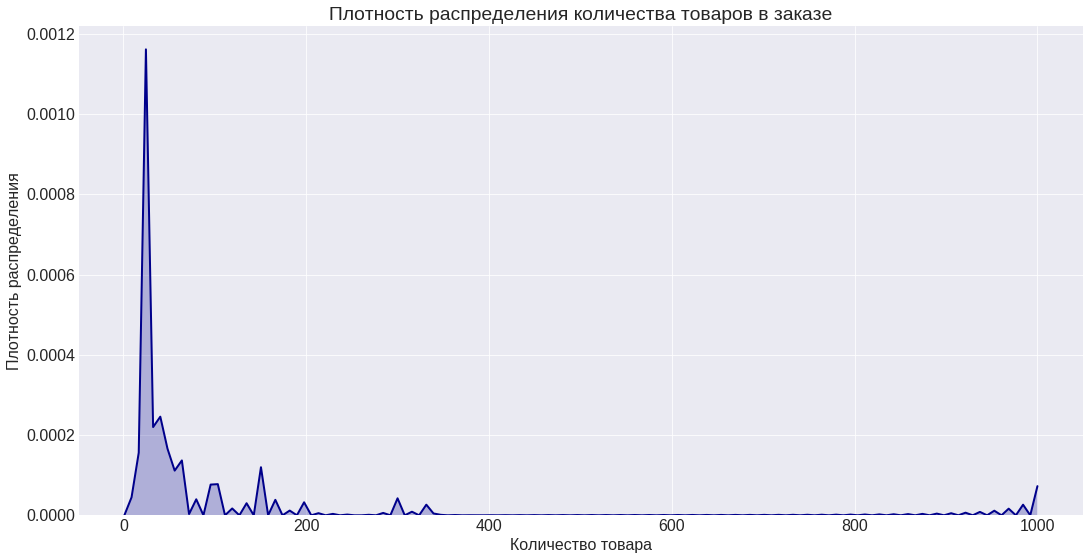

In [23]:
# посмотрим на распределение количества товаров в заказе
kdeplot(df_new, 'quantity', 'Количество товара', 'количества товаров в заказе')

В большинстве заказов количество товаров небольшое, однако имеется определенное число заказов с количеством товаров более 100 (условно примем за порог между оптом и розницей).   

In [24]:
# посмотрим на заказы с количеством товаров более 100
df_new.query('quantity > 100')

,date,customer_id,order_id,product,quantity,price
197,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"Крепеж для пружины дверной, 1107055",150,19.0
198,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,Пружина дверная 240 мм оцинкованная (Д-19 мм) ...,150,38.0
485,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
503,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,Муляж ЯБЛОКО 9 см красное,140,59.0
1013,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
2072,2019-03-23 10:00:00,685d3d84-aebb-485b-8e59-344b3df8b3d3,70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150,20.0
3381,2019-05-20 21:00:00,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
3751,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
3819,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0


Имеется 9 заказов с количеством товаров более 100. Будем считать, что такие заказы были совершены оптовыми покупателями, цель нашего исследования - сегметация покупателей розничных товаров, поэтому строки с такими заказами удалим.

In [25]:
# удалим строки с количеством товаров в заказе более 100
df_new = df_new.query('quantity <= 100').reset_index(drop = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4842 entries, 0 to 4841
Data columns (total 6 columns):
date           4842 non-null datetime64[ns]
customer_id    4842 non-null object
order_id       4842 non-null int64
product        4842 non-null object
quantity       4842 non-null int64
price          4842 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 227.1+ KB


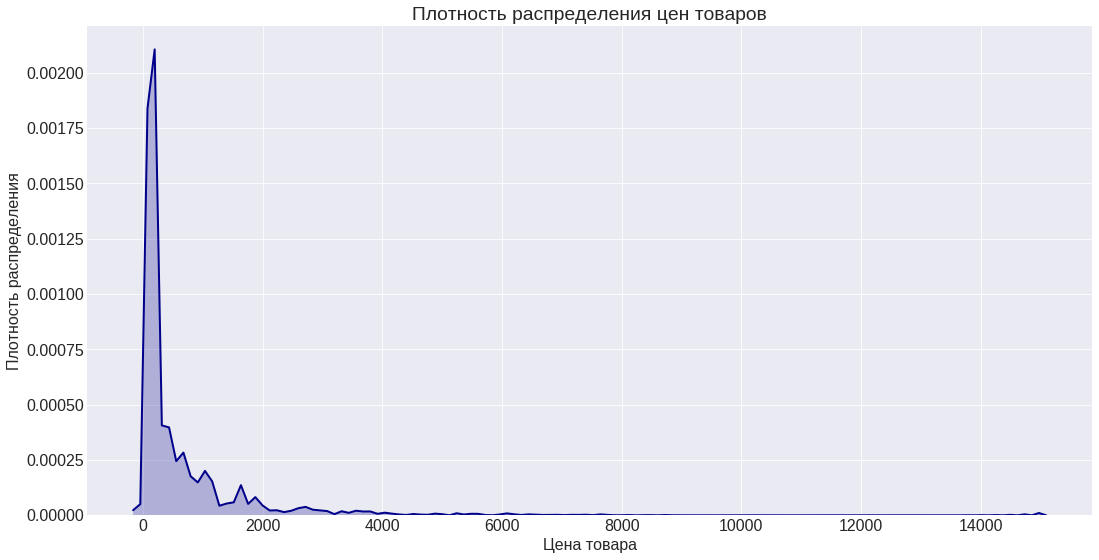

In [26]:
# посмотрим на распределение цен товаров
kdeplot(df_new, 'price', 'Цена товара', 'цен товаров')

В большинстве случаев цена товаров небольшая, однако имеется определенное число товаров со значительной ценой за единицу.

In [27]:
# посмотрим на заказы с ценой за единицу товара более 7000 у.е.
df_new.query('price > 7000')

,date,customer_id,order_id,product,quantity,price
564,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,Сумка-тележка хозяйственная Rolser MOU041 malv...,1,7597.0
1079,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,Гладильная доска Leifheit AirBoard Compact M P...,1,7424.0
1696,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,70423,Сумка-тележка хозяйственная Andersen Alu Star ...,1,8437.0
1990,2019-03-14 18:00:00,27d4ce42-352b-4756-bf5b-8724e05d5131,70740,Сумка-тележка хозяйственная Rolser IMX006 bass...,1,7679.0
2296,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,71035,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737.0
2533,2019-04-20 08:00:00,16838b36-762a-474d-bda4-bad95f8d7813,71209,Автоматическая щетка Leifheit для мытья окон с...,1,7229.0
2547,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,71227,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0
3746,2019-06-11 10:00:00,85716494-dd51-4d1d-ab28-8c74b87f14dc,71674,Сушилка для белья Leifheit Pegasus 200 DeLuxe ...,1,7004.0
4188,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400...,1,14917.0
4189,2019-07-30 01:00:00,e2fe6b48-1955-4882-925c-733f545df026,72140,Сумка-тележка хозяйственная Rolser MNB017 fucs...,1,7679.0


Имеется 13 заказов с ценой за единицу товара более 7000 у.е. В основном высокая цена у импортных товаров, а в целом цены за единицу достаточно адекватные, оставим строки с такими товарами без изменения.

In [28]:
# добавим в таблицу столбец с выручкой
df_new['revenue'] = df_new['quantity'] * df_new['price']
df_new['revenue'] = df_new['revenue'].astype('int')
df_new.head()

,date,customer_id,order_id,product,quantity,price,revenue
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112


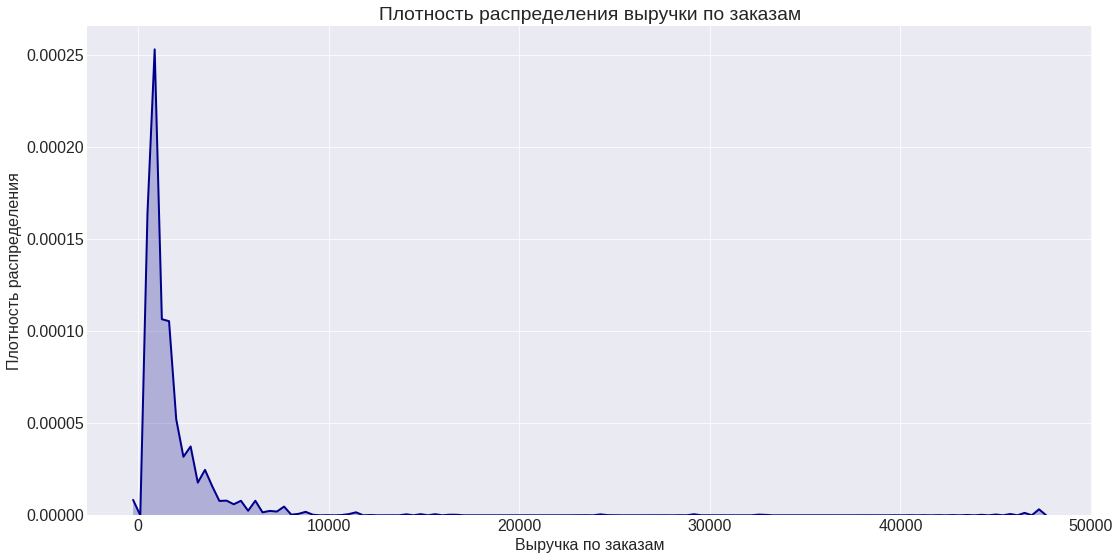

In [29]:
# посмотрим на распределение выручки по заказам
kdeplot(df_new, 'revenue', 'Выручка по заказам', 'выручки по заказам')

В большинстве случаев выручка по заказам небольшая, однако имеется определенное число заказов со значительной их стоимостью.

In [30]:
# посмотрим на заказы с выручкой более 10000 у.е.
df_new.query('revenue > 10000')

,date,customer_id,order_id,product,quantity,price,revenue
567,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см...",5,4874.0,24370
893,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Набор ножей Attribute CHEF 5 предметов AKF522,64,457.0,29248
1132,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,Тележка багажная DELTA ТБР-22 синий грузоподъе...,57,574.0,32718
1297,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-0...,27,1755.0,47385
1341,2019-01-22 15:00:00,6be74251-7159-4cc0-99fb-d034a17c61b0,69928,Спатифиллум Шопен d-12 см,45,250.0,11250
1429,2019-02-04 06:00:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,Мусорный контейнер Hailo BigBin Swing 45 0845-...,3,5512.0,16536
1479,2019-02-07 09:00:00,af4d270b-c7ae-4af5-9582-4e61ff08eff0,70135,"Веник сорго с деревянной ручкой с 4-мя швами, ...",20,550.0,11000
2529,2019-04-19 18:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71204,Салфетка Protec Textil Polyline 30х43 см Амети...,60,191.0,11460
2530,2019-04-19 18:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71205,Наматрацник Natures Бархатный бамбук ББ-Н-1-2 ...,12,1183.0,14196
2531,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,Одеяло Wellness T142 белое темостеганое 140х20...,10,1568.0,15680


Имеется 12 заказов с выручкой более 10000 у.е. В целом выручка по заказам, учитывая количество товаров в заказе и их цену, достаточно адекватная, оставим строки с такими заказами без изменения.

Данные для исследования готовы.

#### Вывод
<a name="preparation_5"></a>

У трех столбцов тип данных целочисленный, у двух - строковый, у одного - вещественный. Столбец с датой заказа привели к формату `datetime`.   

Пропущенные значения  и дубликаты в данных отсутствуют. Вместе с тем, установлено 1864 строки с одинаковыми значениями во всех столбцах, кроме даты заказа. Вероятнее всего это строки по одним и тем же заказам, но разным событиям (например, заказ, оформление доставки, получение товара и т.п.). Такие строки с неявными дубликатами удалили. Кроме этого, выявлено 22 строки с одинаковыми значениями во всех столбцах, кроме количества товаров в заказе и цены товаров. Вероятнее всего это строки по одним и тем же заказам, по которым на стадии их исполнения были изменены либо количество товаров в заказе, либо цена товаров. Такие строки с неявными дубликатами также удалили. После кластеризации будут удалены строки с одними и теми же заказами, совершенными разными покупателями. После удаления дубликатов в таблице осталось 72% строк.  

В таблице имеется информация:  
- за период с 0 часов 1 октября 2018 года по 14 часов 31 октября 2019 года, т.е. за 13 месяцев;    
- по 2451 уникальному покупателю, при этом максимальное количество товаров, приобретенное одним покупателем - 143, а максимальное количество заказов, совершенных одним покупателем - 126;      
- по 2784 уникальным заказам, при этом максимальное количество товаров в одном заказе - 51;    
- по 2343 уникальным приобретенным товарам, при этом максимальное количество заказов конкретного товара - 66.   

В большинстве заказов количество товаров небольшое, однако имеется 9 заказов с количеством товаров более 100 (условно приняли за порог между оптом и розницей). Будем считать, что такие заказы были совершены оптовыми покупателями, цель нашего исследования - сегметация покупателей розничных товаров, поэтому строки с такими заказами удалили.  

В большинстве случаев цена товаров небольшая, однако имеется 13 заказов с ценой за единицу товара более 7000 у.е. В основном высокая цена у импортных товаров, а в целом цены за единицу достаточно адекватные, поэтому оставили строки с такими товарами без изменения.   

В большинстве случаев выручка по заказам небольшая, однако имеется 12 заказов с выручкой более 10000 у.е. В целом выручка по заказам, учитывая количество товаров в заказе и их цену, достаточно адекватная, поэтому оставили строки с такими заказами без изменения.  

### Исследовательский анализ данных
<a name="analysis"></a>

#### Сегментирование покупателей по категориям приобретаемых товаров
<a name="analysis_1"></a>

Сегментирование покупателей по категориям приобретаемых товаров проведем при помощи алгоритма машинного обучения без учителя K-Means, но перед этим текст преобразуем в частотные векторы слова с использованием метода TF-IDF.

Проведем подготовительную работу.

In [31]:
# получим список стоп-слов
stop_words = set(stopwords.words('russian'))
len(stop_words)

151

Сформировали множество из 151 элемента.

In [32]:
# удалим из столбца с наименованиями товаров знаки пунктуации и создадим столбец для лемматизации
tr_table = str.maketrans('', '', string.punctuation)
df_new['product_lemma'] = df_new['product'].apply(lambda x: x.translate(tr_table))
df_new.head()

,date,customer_id,order_id,product,quantity,price,revenue,product_lemma
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142,Комнатное растение в горшке Алое Вера d12 h30
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194,Комнатное растение в горшке Кофе Арабика d12 h25
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112,Радермахера d12 см h20 см
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179,Хризолидокарпус Лутесценс d9 см
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112,Циперус Зумула d12 см h25 см


In [33]:
# проведем лемматизацию наименований товаров
m = Mystem()
df_new['product_lemma'] = df_new['product_lemma'].apply(m.lemmatize)
df_new.head()

,date,customer_id,order_id,product,quantity,price,revenue,product_lemma
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142,"[комнатный, , растение, , в, , горшок, , а..."
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194,"[комнатный, , растение, , в, , горшок, , к..."
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112,"[радермахер, , d12, , см, , h20, , см, \n]"
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179,"[хризолидокарпус, , лутесценс, , d9, , см, \n]"
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112,"[циперус, , зумула, , d12, , см, , h25, ,..."


In [34]:
# удалим стоп-слова из столбца с лемматизированными наименованиями товаров
df_new['product_lemma'] = df_new['product_lemma']\
                       .apply(lambda x: [word for word in x if not word in stop_words and word not in [' ', '\n']])
df_new.head()

,date,customer_id,order_id,product,quantity,price,revenue,product_lemma
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142,"[комнатный, растение, горшок, алый, вера, d12,..."
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194,"[комнатный, растение, горшок, кофе, арабика, d..."
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112,"[радермахер, d12, см, h20, см]"
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179,"[хризолидокарпус, лутесценс, d9, см]"
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112,"[циперус, зумула, d12, см, h25, см]"


In [35]:
# преобразуем текст в частотные векторы слова
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_new['product_lemma'].apply(lambda x: ' '.join(x)))
X.shape

(4842, 4596)

Для подачи в модель машинного обучения сформировалась матрица размером 4842х4596.

In [36]:
# разделим наименования товаров на кластеры
model = KMeans(n_clusters = 20, random_state = 5000)
df_new['cluster'] = model.fit_predict(X)
df_new.head()

,date,customer_id,order_id,product,quantity,price,revenue,product_lemma,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142,"[комнатный, растение, горшок, алый, вера, d12,...",5
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194,"[комнатный, растение, горшок, кофе, арабика, d...",5
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112,"[радермахер, d12, см, h20, см]",5
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179,"[хризолидокарпус, лутесценс, d9, см]",5
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112,"[циперус, зумула, d12, см, h25, см]",5


Все товары разделили на 20 кластеров. Такое большое их количество принято для более тщательного распределения товаров на категории с дальнейшим объединением кластеров.

Вернемся к работе с дубликатами.

In [37]:
# найдем количество строк с одними и теми же заказами, совершенными разными покупателями
df_new[df_new.columns[2:4]].duplicated().sum()

34

Установлено 34 строки с одними и теми же заказами, совершенными разными покупателями. Изучим такие строки подробнее.

In [38]:
# посмотрим на строки с одними и теми же заказами, совершенными разными покупателями
df_new[df_new[df_new.columns[2:4]].duplicated(keep = False)].head(10)

,date,customer_id,order_id,product,quantity,price,revenue,product_lemma,cluster
456,2018-10-28 22:00:00,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0,374,"[сидение, ванна, раздвижной, белый, СВ5, ника]",0
468,2018-10-30 21:00:00,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0,374,"[сидение, ванна, раздвижной, белый, СВ5, ника]",0
1006,2018-12-10 12:00:00,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0,164,"[сушилка, белье, батарея, ника, СБ665, двухъяр...",9
1010,2018-12-10 16:00:00,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0,164,"[сушилка, белье, батарея, ника, СБ665, двухъяр...",9
1026,2018-12-11 21:00:00,954172a5-634c-4a50-941d-9db6d15a7377,69310,"Муляж Груша желтый 9,5 см полиуретан",7,59.0,413,"[муляж, груша, желтый, 95, см, полиуретан]",14
1043,2018-12-13 19:00:00,70d60304-4b3c-4f34-9430-1872ec6e6309,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0,974,"[сушилка, белье, Attribute, прима, 18, м, сини...",9
1054,2018-12-15 07:00:00,22e4d79f-3613-4c22-8b01-7f880120bf5a,69345,Сушилка для белья Attribute ПРИМА 18 м синяя A...,1,974.0,974,"[сушилка, белье, Attribute, прима, 18, м, сини...",9
1076,2018-12-17 14:00:00,4ea06f66-0876-4dec-8d14-ea994ffe435f,69410,Муляж Желудь 2 шт,3,22.0,66,"[муляж, желудь, 2, шт]",14
1094,2018-12-18 20:00:00,caaa3f41-c9ab-4e3d-8b75-94e1d3a8d7b4,69410,Муляж Желудь 2 шт,3,22.0,66,"[муляж, желудь, 2, шт]",14
1125,2018-12-21 11:00:00,266beb08-ec9b-43b4-89bb-ac60fa23ffee,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,1274.0,1274,"[набор, столовый, прибор, 24, предмет, FARANDO...",0


Вероятнее всего это строки по одним и тем же заказам, по которым произошел сбой при выгрузке данных. Такие строки с неявными дубликатами следует удалить.

In [39]:
# удалим строки с одними и теми же заказами, совершенными разными покупателями
df_new = df_new[~df_new[df_new.columns[2:4]].duplicated(keep = 'last')]\
                                            .reset_index(drop = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 9 columns):
date             4808 non-null datetime64[ns]
customer_id      4808 non-null object
order_id         4808 non-null int64
product          4808 non-null object
quantity         4808 non-null int64
price            4808 non-null float64
revenue          4808 non-null int64
product_lemma    4808 non-null object
cluster          4808 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(3)
memory usage: 319.4+ KB


In [40]:
# проверим, все ли строки были удалены
df_new.groupby('order_id')['customer_id'].nunique().sort_values(ascending = False).head()

order_id
69485    2
73164    1
69518    1
69531    1
69528    1
Name: customer_id, dtype: int64

Установлен один заказ, совершенный разными покупателями.Изучим такие строки подробнее. 

In [41]:
# посмотрим на строки с заказом 69485
df_new[df_new['order_id'] == 69485]

,date,customer_id,order_id,product,quantity,price,revenue,product_lemma,cluster
1111,2018-12-20 16:00:00,5be0f4b4-947f-4672-b147-73ef5936ecd4,69485,Набор столовых приборов 24 предмета SAINT GERM...,1,1087.0,1087,"[набор, столовый, прибор, 24, предмет, SAINT, ...",0
1186,2018-12-26 23:00:00,e0461045-4fcc-4731-8837-509f6534512a,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,1274.0,1274,"[набор, столовый, прибор, 24, предмет, FARANDO...",0


Вероятнее всего это строки по одному и тому же заказу, по которому также произошел сбой при выгрузке данных. Такую строку с неявным дубликатом следует удалить.

In [42]:
# удалим  строку с заказом, совершенным разными покупателями 
df_new = df_new.drop(index = 1186).reset_index(drop = True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 9 columns):
date             4807 non-null datetime64[ns]
customer_id      4807 non-null object
order_id         4807 non-null int64
product          4807 non-null object
quantity         4807 non-null int64
price            4807 non-null float64
revenue          4807 non-null int64
product_lemma    4807 non-null object
cluster          4807 non-null int32
dtypes: datetime64[ns](1), float64(1), int32(1), int64(3), object(3)
memory usage: 319.3+ KB


Теперь точно данные к исследованию готовы.

In [43]:
# посмотрим на распределение товаров по кластерам
df_new['cluster'].value_counts()

0     1073
5      511
10     332
4      283
9      272
8      251
17     220
13     200
1      174
15     170
2      167
16     166
11     163
14     157
7      151
19     116
3      110
6      105
18     101
12      85
Name: cluster, dtype: int64

Все товары распределены по кластерам с количеством от 85 до 1073.

Для распределения товаров по категориям необходимо изучить состав каждого кластера.

In [44]:
# изучим состав кластеров
df_new[df_new.cluster == 0]['product'].value_counts()[:10]

Сумка для тележки большая комбинированная 45*30*25, 1209021                        9
Сиденье в ванну раздвижное, белый, СВ5, НИКА                                       6
Подрукавник складной Ника П                                                        6
Корыто оцинкованное 45 л бесшовное, 1303007                                        6
Сумка-тележка хозяйственная Andersen Scala Shopper Plus, Lini, синяя 133-108-90    5
Стяжка оконная с болтом СТ-55 цинк, 1108354                                        5
Салатник Luminarc КУТЮР 27 см H3529                                                4
Сумка-тележка хозяйственная Rolser Jet Joy синяя, JET001 azul JOY                  4
Щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096     4
Вешалка-плечики без эссенции цвет тёмно-розовый FWM-002/Quartz pink                4
Name: product, dtype: int64

После изучения кластеров установлено:  
  -  кластер 0 - товары из разных категорий;  
  -  кластер 1 - цветы;  
  -  кластер 2 - пластмассовые изделия;  
  -  кластер 3 - цветы;  
  -  кластер 4 - рассада;  
  -  кластер 5 - товары из разных категорий;  
  -  кластер 6 - искусственные цветы;  
  -  кластер 7 - сумки-тележки;  
  -  кластер 8 - цветы в горшках;  
  -  кластер 9 - сушилки для белья;  
  -  кластер 10 - черенки цветов;  
  -  кластер 11 - цветы и рассада;  
  -  кластер 12 - тележки багажные;  
  -  кластер 13 - гладильные доски;  
  -  кластер 14 - муляжи;  
  -  кластер 15 - цветы;  
  -  кластер 16 - семена и рассада;  
  -  кластер 17 - рассада;  
  -  кластер 18 - коврики;  
  -  кластер 19 - аксессуары для ванной.  

Целесообразно, объединив кластеры, а также вручную распределив товары в кластерах 0 и 5, установить следующие категории товаров:  
  -  цветы и семена;    
  -  пластмассовые изделия;  
  -  сумки и тележки;  
  -  украшения для дома;  
  -  сушилки для белья;  
  -  гладильные доски;  
  -  коврики;   
  -  аксессуары для ванной;   
  -  прочие товары для дома.

In [45]:
# "склеим" значения в столбце с лемматизированными наименованиями товаров
df_new['product_lemma'] = df_new['product_lemma'].apply(lambda x: ' '.join(x))
df_new.head()

,date,customer_id,order_id,product,quantity,price,revenue,product_lemma,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142,комнатный растение горшок алый вера d12 h30,5
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194,комнатный растение горшок кофе арабика d12 h25,5
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112,радермахер d12 см h20 см,5
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179,хризолидокарпус лутесценс d9 см,5
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112,циперус зумула d12 см h25 см,5


In [46]:
# создадим функцию для категоризации товаров с учетом их кластеров
def product_classification(cluster):
    
    # cluster - кластер, в который попал товар

    if cluster in [1, 3, 4, 5, 8, 10, 11, 15, 16, 17]:
        return 'цветы и семена'
    if cluster == 2:
        return 'пластмассовые изделия'
    if cluster in [7, 12]:
        return 'сумки и тележки'
    if cluster in [6, 14]:
        return 'украшения для дома'
    if cluster == 9:
        return 'сушилки для белья'
    if cluster == 13:
        return 'гладильные доски'
    if cluster == 18:
        return 'коврики'
    if cluster == 19:
        return 'аксессуары для ванной'
    return 'прочие товары для дома'

In [47]:
# создадим столбец с категориями товаров
df_new['product_category'] = df_new['cluster'].apply(product_classification)
df_new.sample(10)

,date,customer_id,order_id,product,quantity,price,revenue,product_lemma,cluster,product_category
2822,2019-04-29 20:00:00,b6da6f7a-d2a3-424a-878e-1876c8b88126,14706,Рассада Капусты белокачанная сорт Июньская кас...,2,120.0,240,рассада капуста белокачать сорт июньский кассе...,4,цветы и семена
2431,2019-04-16 13:00:00,0184f535-b60a-4914-a982-231e3f615206,14649,Виола рассада однолетних цветов в кассете по 1...,1,210.0,210,виола рассада однолетний цветок кассета 10 шт,4,цветы и семена
2197,2019-04-02 12:00:00,a3394ff2-4cd2-4332-9f6c-2668ac608fbc,14608,Калибрахоа Sweet Bells Double Golden желтая ма...,1,82.0,82,калибрахоа Sweet Bells Double Golden желтый ма...,8,цветы и семена
2076,2019-03-25 11:00:00,d16fbc13-50a6-4dea-aafc-bc197aafc9e4,14588,Пеларгония розебудная Red Pandora укорененный ...,1,135.0,135,пеларгония розебудный Red Pandora укоренять че...,10,цветы и семена
605,2018-11-08 16:00:00,8dbfb5d0-837c-4cb7-a5d9-88ff7ed304e8,68919,Муляж Персики мини полиуретан d-6 см,1,22.0,22,муляж персик мини полиуретан d6 см,14,украшения для дома
3873,2019-07-01 22:00:00,aa08d880-4085-4ee3-b99c-b9ea4e59059f,71849,Сушилка для белья потолочная ЛИАНА ЛЮКС 160 см...,1,449.0,449,сушилка белье потолочный лиана люкс 160 см ЛЛП160,9,сушилки для белья
4404,2019-09-05 22:00:00,51851f8e-e239-4e31-ab2c-4b67ab2c76da,72517,Бальзамин новогвинейский d-13 см ярко красный,1,134.0,134,бальзамин новогвинейский d13 см ярко красный,5,цветы и семена
449,2018-10-28 11:00:00,1ea6fce0-e942-465b-ba20-9c4df6b8681e,68777,Чехол для гладильной доски с дизайном Venezia ...,1,734.0,734,чехол гладильный доска дизайн Venezia 140х55 с...,13,гладильные доски
3514,2019-05-30 22:00:00,35bf6304-20ea-47fd-a5a5-2d74459b2eef,14830,Пеларгония зональная диам. 12 см лососевая мах...,1,150.0,150,пеларгония зональный диам 12 см лососевый махр...,1,цветы и семена
720,2018-11-17 11:00:00,3414d523-5337-49b9-84f5-dd151a0b5077,69032,"Ёрш унитазный с подставкой WC ""Люкс"", Мультипл...",1,56.0,56,ерш унитазный подставка WC люкс мультипласт 17...,0,прочие товары для дома


Изучим кластеры 0 и 5 и определим слова для включения товаров в конкретные категории. 

In [48]:
# составим списки для распределения товаров из кластеров 0 и 5 по категориям
seeds_and_flowers = ['салат', 'папоротник', 'гипсофил', 'укроп', 'кореопсис', 'базилик', 'томат', 'алиссум',
                     'цикламен', 'антуриум', 'кассета', 'ячейка', 'бегония', 'аквилегия', 'петуния', 'гвоздик',
                     'калла', 'клен', 'бузульник', 'гайлардий', 'осина', 'клубника', 'роза', 'настурция',
                     'годеция', 'огурец', 'рассада', 'маттиола', 'очиток', 'бадан', 'цинния', 'тюльпан',
                     'календула', 'косметь', 'флокс', 'лаватер', 'энотера', 'капуста', 'дендробиум', 'хризантема',
                     'зев', 'амброзия', 'незабудка', 'рудбекия', 'морковь', 'лапчатка', 'бархатцы', 'смолевка',
                     'гортензия', 'ель', 'земляника', 'тимьян', 'георгин', 'монарда', 'ранункулус', 'кипарисовик',
                     'петрушка', 'эшшольций', 'пиретрум', 'цинерария', 'фуксия', 'валериана', 'пеларгония', 'дыня',
                     'арбуз', 'вербейник']
textile_products = ['салфетка', 'скатерть', 'простыня', 'полотенце', 'постельный', 'наматрасник', 'пододеяльник',
                    'наматрацникчехол','плед', 'покрывало', 'подушка', 'одеяло', 'наволочка', 'наматрацник',
                    'наматрицникчехол']
household_goods = ['чехол', 'окномойка', 'полка', 'термометр', 'электроштопор', 'выпечка', 'щетка', 'валик',
                   'кружка', 'пена']
home_decoration = ['муляж', 'искусственный', 'искуственный']
bathroom_accessories = ['ванный', 'ванна']
trolley_bag = ['тележка', 'сумкатележка', 'сумка']
plastic_products = ['корзина', 'ведро', 'таз']
dryer = ['сушилка']
ironing_board = ['гладильный']

In [49]:
# создадим функцию для категоризации товаров с учетом созданных списков слов
def categories_clarification(words_list, category):
    
    # words_list - список со словами по категориям ; category - категория товаров
    
    df_new.loc[pd.DataFrame([df_new['product_lemma'].str.contains(r'\b%s\b' % word) for word in words_list])\
          .apply(lambda row: np.any(row)), 'product_category'] = category

In [50]:
# проведем категоризацию товаров из кластеров 0 и 5
categories_clarification(seeds_and_flowers,'цветы и семена')
categories_clarification(textile_products,'текстильные изделия')
categories_clarification(home_decoration,'украшения для дома')
categories_clarification(bathroom_accessories,'аксессуары для ванной')
categories_clarification(trolley_bag,'сумки и тележки')
categories_clarification(plastic_products,'пластмассовые изделия')
categories_clarification(household_goods,'прочие товары для дома')
categories_clarification(dryer,'сушилки для белья')
categories_clarification(ironing_board,'гладильные доски')
df_new.head()

,date,customer_id,order_id,product,quantity,price,revenue,product_lemma,cluster,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142,комнатный растение горшок алый вера d12 h30,5,цветы и семена
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194,комнатный растение горшок кофе арабика d12 h25,5,цветы и семена
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112,радермахер d12 см h20 см,5,цветы и семена
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179,хризолидокарпус лутесценс d9 см,5,цветы и семена
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112,циперус зумула d12 см h25 см,5,цветы и семена


Распределение товаров по категориям завершено.

In [51]:
# посмотрим на распределение товаров по категориям
df_new['product_category'].value_counts()

цветы и семена            2476
прочие товары для дома     773
сумки и тележки            349
сушилки для белья          277
украшения для дома         274
гладильные доски           192
пластмассовые изделия      149
аксессуары для ванной      131
коврики                     98
текстильные изделия         88
Name: product_category, dtype: int64

Таким образом товары распределены по 10 категориям с количеством их заказов от 88 до 2476.

In [52]:
# удалим столбец с лемматизированными наименованиями товаров
df_new = df_new.drop('product_lemma', axis = 1)
df_new.head()

,date,customer_id,order_id,product,quantity,price,revenue,cluster,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142,5,цветы и семена
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194,5,цветы и семена
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112,5,цветы и семена
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179,5,цветы и семена
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112,5,цветы и семена


In [53]:
# сгруппируем заказы по категориям товаров и добавим столбец со средним чеком
product_category_group = df_new.groupby('product_category')\
                               .agg(customers_count = ('customer_id', 'nunique'),
                                    orders_count = ('order_id', 'nunique'),
                                    revenue = ('revenue', 'sum'))\
                               .sort_values(by = 'customers_count',
                                            ascending = False)\
                               .reset_index()
product_category_group['avg_fee'] = round(product_category_group['revenue']\
                                          / product_category_group['orders_count'], 2)
product_category_group

,product_category,customers_count,orders_count,revenue,avg_fee
0,цветы и семена,655,756,515149,681.41
1,прочие товары для дома,591,652,865159,1326.93
2,сумки и тележки,303,344,712480,2071.16
3,сушилки для белья,237,273,314596,1152.37
4,украшения для дома,176,193,80953,419.45
5,гладильные доски,165,188,288971,1537.08
6,пластмассовые изделия,122,134,99601,743.29
7,аксессуары для ванной,111,126,149763,1188.60
8,коврики,83,90,100232,1113.69
9,текстильные изделия,75,84,207790,2473.69


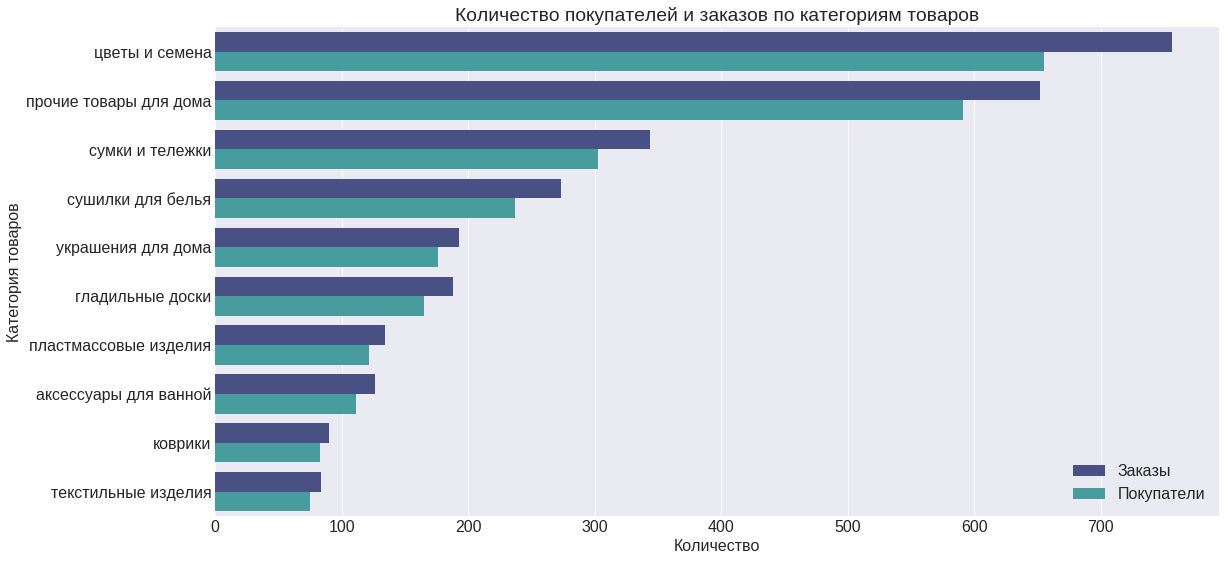

In [54]:
# построим график с количеством покупателей и заказов по категориям товаров
product_category_customer = df_new.groupby('product_category')\
                                  .agg(users_count = ('customer_id', 'nunique'))\
                                  .sort_values(by = 'users_count',
                                               ascending = False)\
                                  .reset_index()
product_category_customer['type_users'] = 'Покупатели'
product_category_order = df_new.groupby('product_category')\
                               .agg(users_count = ('order_id', 'nunique'))\
                               .sort_values(by = 'users_count',
                                            ascending = False)\
                               .reset_index()
product_category_order['type_users'] = 'Заказы'
product_category_all = pd.concat([product_category_order, product_category_customer], ignore_index = True)
fig, ax = plt.subplots()
plt.title('Количество покупателей и заказов по категориям товаров')
ax = sns.barplot(x = 'users_count',
                 y = 'product_category',
                 data = product_category_all,
                 hue = 'type_users',
                 palette = 'mako')
plt.xlabel('Количество')
plt.ylabel('Категория товаров')
plt.legend(title = None)
plt.show()

Наибольшее количество и покупателей, и заказов у категорий "цветы и семена" и "прочие товары для дома", наименьшее - "текстильные изделия" и "коврики".

Для исследования значений выручки и среднего чека рассчитаем кумулятивные показатели.

In [55]:
# создадим функцию для расчета кумулятивных показателей
def cumulative_data(df, group):
     
    # df - таблица, для которой будут рассчитываться показатели; group - сегмент покупателей
    
    dates_groups = df[['date', group]].drop_duplicates()
    orders_agg = dates_groups.apply(lambda x: df[np.logical_and(df['date'] <= x['date'],
                                                                df[group] == x[group])]\
                             .agg({'date': 'max',
                                    group: 'max',
                                   'order_id': pd.Series.nunique,
                                   'customer_id': pd.Series.nunique,
                                   'revenue': 'sum'}),
                                  axis = 1)\
                             .sort_values(by = ['date',
                                                 group])
    orders_agg.columns = ['date', group, 'orders_count', 'customers_count', 'revenue']
    orders_agg['avg_fee'] = round(orders_agg['revenue'] / orders_agg['orders_count'], 2)
    return orders_agg

In [56]:
# создадим функцию для построения графиков кумулятивных показателей
def cumulative_plot(df, indicator, group, title, ylabel):
     
    # df - таблица, для которой будет строится график; indicator - показатель, по которому будет строиться
    # график, group - сегмент покупателей, title - заголовок графика, ylabel - подпись оси Y
    
    fig, ax = plt.subplots()
    plt.title(title)
    for category in df[group].unique():
        ax = sns.lineplot(x = 'date',
                          y = indicator,
                          data = df[df[group] == category],
                          label = category,
                          linewidth = 3)
    plt.xlabel('Месяц, год')
    plt.ylabel(ylabel)
    ax.legend(bbox_to_anchor = (1, 1))
    plt.show() 

In [57]:
# применим функцию для расчета кумулятивной выручки по категориям товаров
cumulative_data_product = cumulative_data(df_new, 'product_category')
cumulative_data_product.tail()

,date,product_category,orders_count,customers_count,revenue,avg_fee
4803,2019-10-31 11:00:00,пластмассовые изделия,133,122,99204,745.89
4802,2019-10-31 11:00:00,цветы и семена,755,654,514992,682.11
4804,2019-10-31 12:00:00,сумки и тележки,344,303,712480,2071.16
4805,2019-10-31 13:00:00,цветы и семена,756,655,515149,681.41
4806,2019-10-31 14:00:00,пластмассовые изделия,134,122,99601,743.29


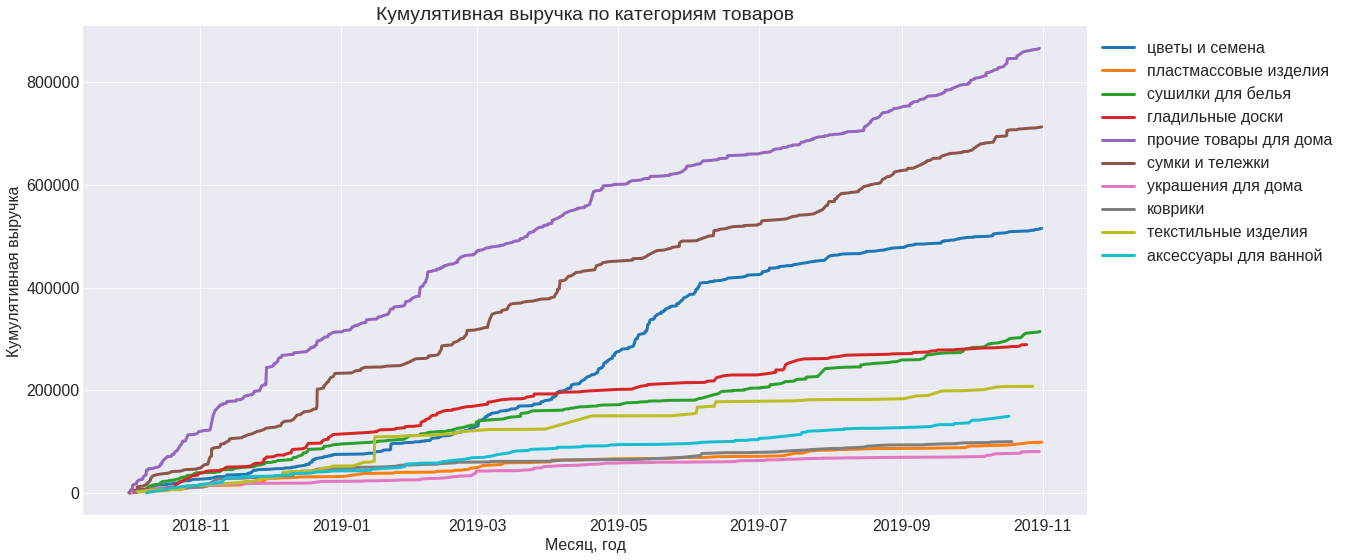

In [58]:
# применим функцию для построения графиков кумулятивной выручки по категориям товаров
cumulative_plot(cumulative_data_product,
                'revenue',
                'product_category',
                'Кумулятивная выручка по категориям товаров',
                'Кумулятивная выручка')

Наибольшую выручку принесли покупатели категории товаров "прочие товары для дома" и "сумки и тележки", наименьшую - "украшения для дома" и "пластмассовые изделия", при этом практически по всем категориям кумулятивная выручка растет достаточно равномерно. Исключение - товары из категорий "цветы и семена" с более резким ростом в апреле - июне 2019 года, связанный с сезонностью покупок товаров данной категории, а также "текстильные изделия" с сильным всплеском в январе, вероятнее всего связанный с разовой крупной покупкой.

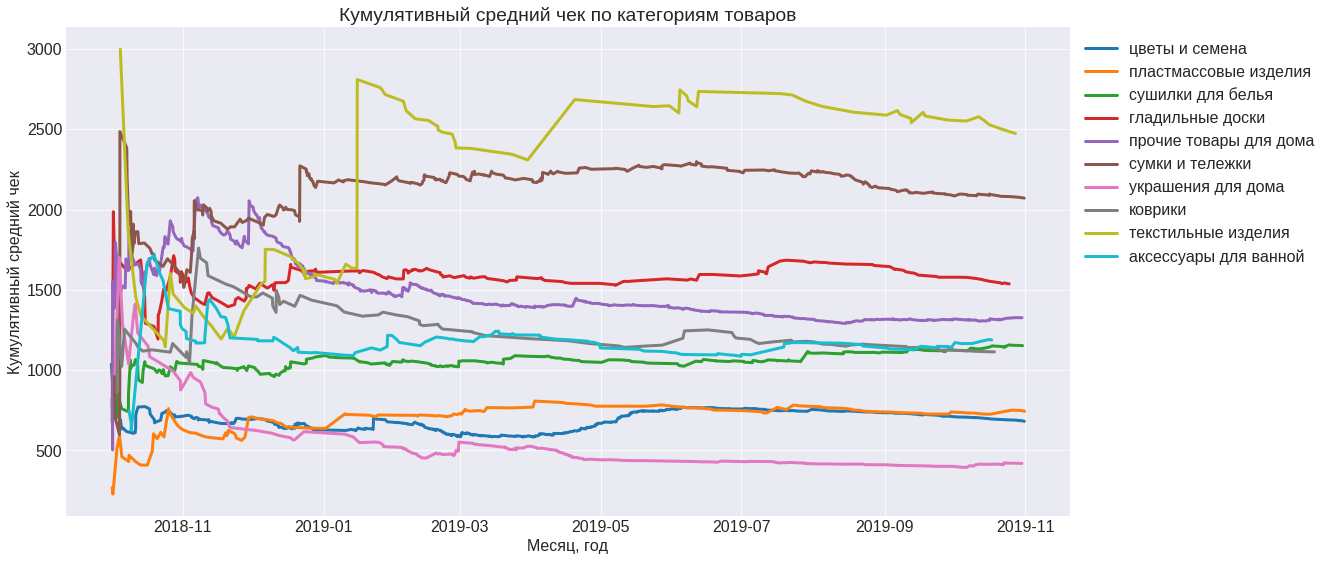

In [59]:
# применим функцию для для построения графиков кумулятивного среднего чека по категориям товаров
cumulative_plot(cumulative_data_product,
                'avg_fee',
                'product_category',
                'Кумулятивный средний чек по категориям товаров',
                'Кумулятивный средний чек')

Наибольший средний чек у покупателей категории товаров "текстильные изделия" и "сумки и тележки", наименьший - "украшения для дома" и "цветы и семена" (категория с наибольшим количеством покупателей и заказов), при этом практически по всем категориям через 2 месяца после начала анализируемого периода кумулятивный средний чек находится практически на одном уровне. Исключение - товары из категории "текстильные изделия" с сильным всплеском в январе, вероятнее всего связанный с разовой крупной покупкой. Кроме того обращает на себя внимание постепенное снижение среднего чека у товаров из категорий "прочие товары для дома", "коврики" и "украшения для дома".

Разделим покупателей на два сегмента: тех, кто осуществлял покупки товаров только одной категории, и тех, кто покупал товары двух и более разных категорий.

In [60]:
# разделим покупателей на сегменты
df_groups_more_one = df_new.groupby('customer_id')\
                           .filter(lambda x: x['product_category'].nunique() > 1)
df_group_one = df_new.groupby('customer_id')\
                           .filter(lambda x: x['product_category'].nunique() == 1)
df_groups_more_one['customer_id'].nunique()

71

In [61]:
round(df_groups_more_one['customer_id'].nunique() / df_new['customer_id'].nunique() * 100, 2)

2.94

71 покупатель осуществлял покупки товаров двух и более разных категорий, что составляет чуть менее 3% от всех покупателей.

In [62]:
# создадим таблицу по покупателям, которыми осуществлялись покупки товаров двух и более разных категорий
customers_groups_more_one = df_groups_more_one.groupby('customer_id')['product_category'].apply(set)                     
customers_groups_more_one = pd.DataFrame(customers_groups_more_one)['product_category'].apply(list).reset_index() 
customers_groups_more_one

,customer_id,product_category
0,0a4e4711-5cb7-4bae-93cf-6731902708de,"[цветы и семена, гладильные доски]"
1,11fa97e3-7882-47f9-92fa-9a9332ec8615,"[гладильные доски, сушилки для белья]"
2,13f31376-e99b-4a4a-a538-8a5dc64f6599,"[аксессуары для ванной, украшения для дома, пр..."
3,17213b88-1514-47a4-b8aa-ce51378ab34e,"[прочие товары для дома, сушилки для белья]"
4,197e747c-e8c6-4874-af3c-a7d857b82afb,"[сушилки для белья, коврики]"
...,...,...
66,f032a74a-d31d-4815-ac0a-98d139d2ef4f,"[прочие товары для дома, пластмассовые изделия]"
67,f251b71f-4cd2-4440-aa96-6b17334b7b7e,"[прочие товары для дома, гладильные доски]"
68,f2b76506-06da-46b8-950e-81ca072b0ef3,"[цветы и семена, прочие товары для дома]"
69,f90074b9-c4ec-4f3b-8763-37e6ff034540,"[гладильные доски, сушилки для белья]"


In [63]:
# посмотрим на комбинации категорий товаров
customers_groups_more_one['product_category'].value_counts()

[цветы и семена, прочие товары для дома]                                                                                                                                                          9
[прочие товары для дома, гладильные доски]                                                                                                                                                        8
[гладильные доски, сушилки для белья]                                                                                                                                                             7
[прочие товары для дома, пластмассовые изделия]                                                                                                                                                   4
[прочие товары для дома, текстильные изделия]                                                                                                                                                     3
[аксессуары для ванн

Необходимо иметь ввиду, что очень небольшое количество покупателей осуществляют покупки товаров двух и более разных категорий. Считаю, что здесь имеется существенный резерв для повышения эффективности работы интернет-магазина, для чего в дальнейшем следует проверить гипотезу о равенстве среднего чека покупателей, осуществлявших покупки товаров только одной категории, и тех, кто покупал товары двух и более разных категорий. Вместе с тем, уже сейчас следует обратить внимание, что у 11 покупателей присутствует комбинация товаров из категорий "гладильные доски" и "сушилки для белья", т.е. целесообразно покупателям, приобретающим товары из одной указанной категории, предлагать продукты из другой. Вызывает обеспокоенность, что всего 15 покупателей, приобретавших товары из категории "цветы и семена", купили товары из категории "прочие товары для дома", в которую попали садовые инструменты, удобрения и т.п.

Один покупатель приобретал товары из всех выделенных категорий, один - за исключением одной. Изучим таких покупателей подробнее.

In [64]:
# посмотрим на заказы покупателя, приобретавшего товары из всех выделенных категорий
df_groups_more_one.groupby('customer_id')\
                   .filter(lambda x: x['product_category'].nunique() == 10)

,date,customer_id,order_id,product,quantity,price,revenue,cluster,product_category
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0,674,13,гладильные доски
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,Чехол для гладильной доски Festival 137x60 см ...,1,1162.0,1162,13,гладильные доски
60,2018-10-03 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,Набор прищепок большие пластиковые ROZENBAL ПИ...,10,86.0,860,0,прочие товары для дома
61,2018-10-03 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,Сушилка для белья Attribute ПРИМА 11 м синяя н...,1,749.0,749,9,сушилки для белья
124,2018-10-08 07:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,Тележка багажная DELTA ТБР-20 коричневый с ора...,1,742.0,742,12,сумки и тележки
...,...,...,...,...,...,...,...,...,...
1850,2019-03-04 15:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70582,Нефролепис Бостон d-12 см,1,292.0,292,5,цветы и семена
1852,2019-03-04 16:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70589,Калла крупноцветковая желтая,1,374.0,374,0,цветы и семена
1868,2019-03-05 13:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70606,Пеларгония розебудная Red Pandora укорененный ...,1,134.0,134,10,цветы и семена
1872,2019-03-05 15:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70614,Гладильная доска НИКА LORA FASHION HLF 123х46 см,1,1949.0,1949,13,гладильные доски


Из всех выделенных категорий осуществлял оформление заказов покупатель с наибольшим количеством приобретенных товаров - 143. Активность этого покупателя наблюдалась в период с октября 2018 года по март 2019 года.

In [65]:
# посмотрим на заказы покупателя, приобретавшего товары из всех выделенных категорий за исключением одной
df_groups_more_one.groupby('customer_id')\
                   .filter(lambda x: x['product_category'].nunique() == 9)

,date,customer_id,order_id,product,quantity,price,revenue,cluster,product_category
12,2018-10-01 13:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,Чехол Eurogold Clean Basic хлопок для досок 12...,1,187.0,187,13,прочие товары для дома
21,2018-10-02 10:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68491,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1049.0,1049,7,сумки и тележки
42,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 3-х рядная деревянная 450 мм (пло...,15,49.0,735,0,прочие товары для дома
43,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,Щетка-сметка 4-х рядная деревянная 300 мм (фиг...,15,70.0,1050,0,прочие товары для дома
46,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Вилка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...",1,187.0,187,0,прочие товары для дома
47,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка столовая RIPPLE сталь 3 мм, 3 шт, Attrib...",1,202.0,202,0,прочие товары для дома
48,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка чайная RIPPLE сталь 2,5 мм, 3 шт, Attrib...",1,142.0,142,0,прочие товары для дома
49,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Нож столовый RIPPLE 80 г 2 шт, Attribute, ACR042",1,172.0,172,0,прочие товары для дома
50,2018-10-02 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68506,Герань домашняя (пеларгония зональная) цветуща...,11,142.0,1562,3,цветы и семена
66,2018-10-03 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68516,Сушилка для белья потолочно-настенная Gimi Lif...,1,1649.0,1649,9,сушилки для белья


In [66]:
# посчитаем количество приобретенных товаров
len(df_groups_more_one.groupby('customer_id')\
                      .filter(lambda x: x['product_category'].nunique() == 9))

45

Из всех выделенных категорий за исключением одной осуществлял оформление заказов покупатель, приобревший 45 товаров. Активность этого покупателя наблюдалась только в октябре 2018 года.

#### Сегментирование покупателей по сезону осуществления заказа
<a name="analysis_2"></a> 

Проведем сегментирование покупателей по сезону осуществления заказа - зима, весна, лето и осень. Перед этим изучим динамику поведения покупателей в интернет-магазине.

In [67]:
# добавим в таблицу столбцы с датой, месяцем и днем недели осуществления заказа
df_new['day_of_week']  = df_new['date'].dt.weekday
df_new['day'] = df_new['date'].dt.date
df_new['month'] = df_new['date'].dt.month
df_new['month_year'] = df_new['date'].astype('datetime64[M]')
df_new.head()

,date,customer_id,order_id,product,quantity,price,revenue,cluster,product_category,day_of_week,day,month,month_year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142,5,цветы и семена,0,2018-10-01,10,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194,5,цветы и семена,0,2018-10-01,10,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112,5,цветы и семена,0,2018-10-01,10,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179,5,цветы и семена,0,2018-10-01,10,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112,5,цветы и семена,0,2018-10-01,10,2018-10-01


In [68]:
# посчитаем среднюю выручку в день
revenue_per_day = df_new.groupby('day')\
                        .agg(orders_count = ('order_id', 'nunique'),
                             revenue = ('revenue', 'sum'))\
                        .reset_index()
revenue_per_day['avg_fee'] = round(revenue_per_day['revenue'] / revenue_per_day['orders_count'], 2)
revenue_per_day['revenue'].mean()

8528.62915601023

Средняя выручка в день составляет 8529 у.е.

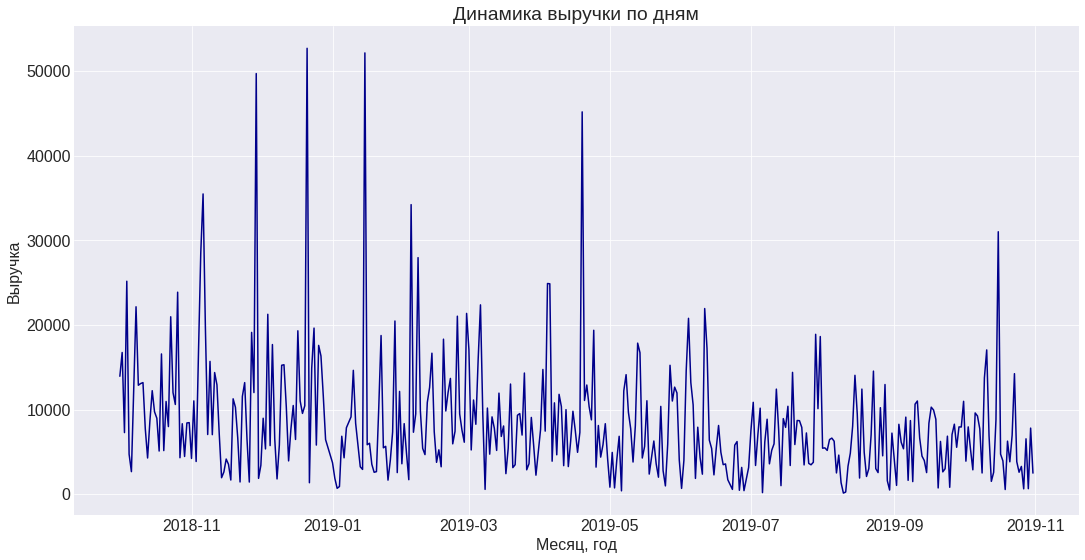

In [69]:
# посмотрим на динамику выручки по дням
fig, ax = plt.subplots()
plt.title('Динамика выручки по дням')
ax = sns.lineplot(x = 'day',
                  y = 'revenue',
                  data = revenue_per_day,
                  color = 'darkblue')       
plt.xlabel('Месяц, год')
plt.ylabel('Выручка')
plt.show()

В основном дневная выручка не превышает 20000 у.е., хотя имеется определенное количество дней с большой выручкой, в некоторые дни даже более 50000 у.е. С течением времени среднедневная выручка снижается. Большое количество зубцов вероятнее всего свидетельствует о разном распределении выручки между будними и выходными днями.

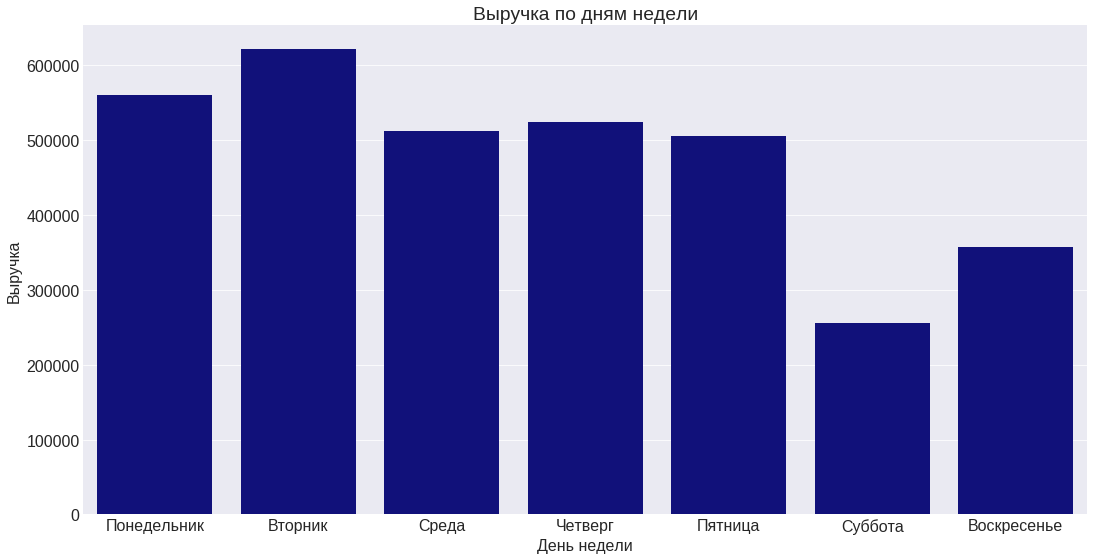

In [70]:
# посмотрим на выручку по дням недели
revenue_per_day_of_week = df_new.groupby('day_of_week')\
                                .agg(orders_count = ('order_id', 'nunique'),
                                     revenue = ('revenue', 'sum'))\
                                .reset_index()
revenue_per_day_of_week['avg_fee'] = round(revenue_per_day_of_week['revenue']\
                                           / revenue_per_day_of_week['orders_count'], 2)
day_of_week = ['Понедельник',
               'Вторник',
               'Среда',
               'Четверг',
               'Пятница',
               'Суббота',
               'Воскресенье']
fig, ax = plt.subplots()
plt.title('Выручка по дням недели')
ax = sns.barplot(x = 'day_of_week',
                 y = 'revenue',
                 data = revenue_per_day_of_week,
                 color = 'darkblue')       
plt.xlabel('День недели')
plt.ylabel('Выручка')
ax.set_xticklabels(labels = day_of_week)
plt.show()

Как и предполагалось, выручка в выходные дни резко снижается, при этом самая большая по вторникам, а самая маленькая по субботам.

In [71]:
# посчитаем среднюю выручку в месяц
revenue_per_month = df_new.groupby('month_year')\
                          .agg(orders_count = ('order_id', 'nunique'),
                               revenue = ('revenue', 'sum'))\
                          .reset_index()
revenue_per_month['avg_fee'] = round(revenue_per_month['revenue'] / revenue_per_month['orders_count'], 2)
revenue_per_month['revenue'].mean()

256514.92307692306

Средняя выручка в месяц составляет 256515 у.е.

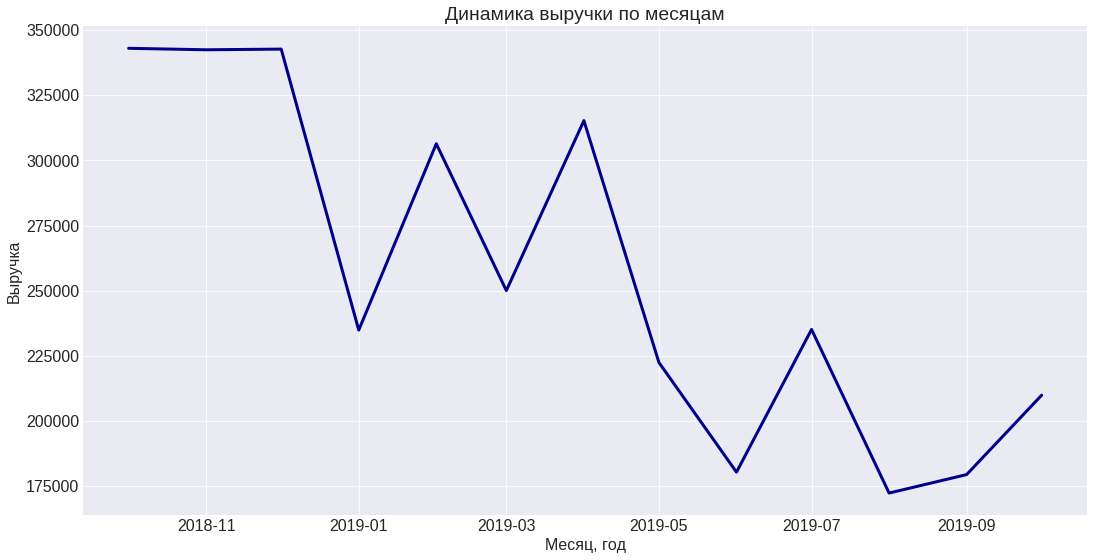

In [72]:
# посмотрим на динамику выручки по месяцам
fig, ax = plt.subplots()
plt.title('Динамика выручки по месяцам')
ax = sns.lineplot(x = 'month_year',
                  y = 'revenue',
                  data = revenue_per_month,
                  color = 'darkblue',
                  linewidth = 3)       
plt.xlabel('Месяц, год')
plt.ylabel('Выручка')
plt.show()

Максимальная средняя выручка в месяц была в течение первых трех месяцев анализируемого периода, а затем резко упала, достигнув минимума в августе 2019 года (в 2 раза меньше максимального значения).

In [73]:
# посчитаем средний чек в день
round(revenue_per_day['revenue'].sum() / revenue_per_day['orders_count'].sum(), 2)

1196.95

Средний чек в день составляет 1197 у.е.

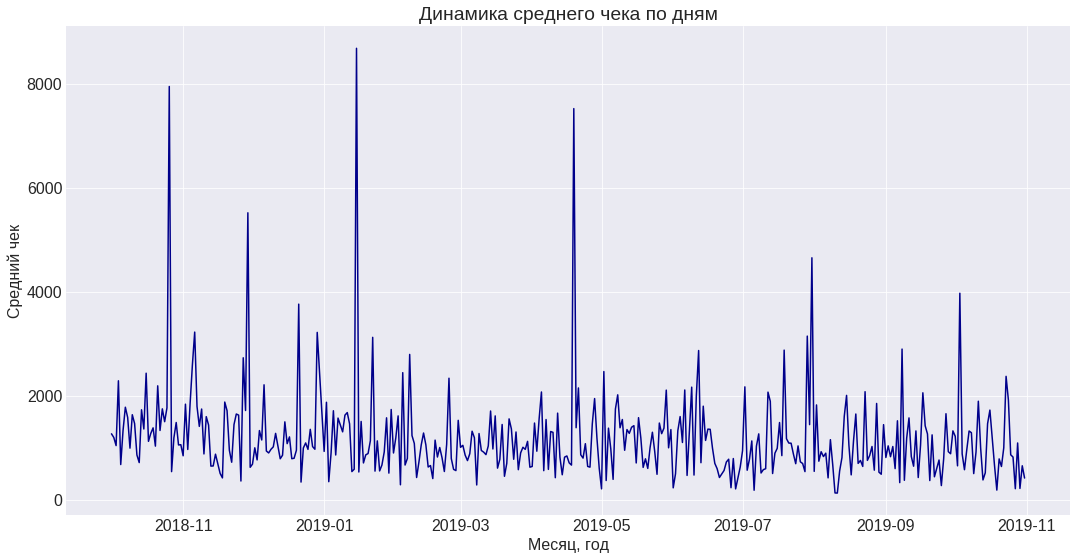

In [74]:
# посмотрим на динамику среднего чека по дням
fig, ax = plt.subplots()
plt.title('Динамика среднего чека по дням')
ax = sns.lineplot(x = 'day',
                  y = 'avg_fee',
                  data = revenue_per_day,
                  color = 'darkblue')       
plt.xlabel('Месяц, год')
plt.ylabel('Средний чек')
plt.show()

В основном средний чек в день не превышает 2000 у.е., хотя имеется определенное количество дней с большим чеком, в некоторые дни даже более 4000 у.е. С течением времени средний чек в день снижается. Большое количество зубцов вероятнее всего свидетельствует о разном среднем чеке в будние и выходные дни.

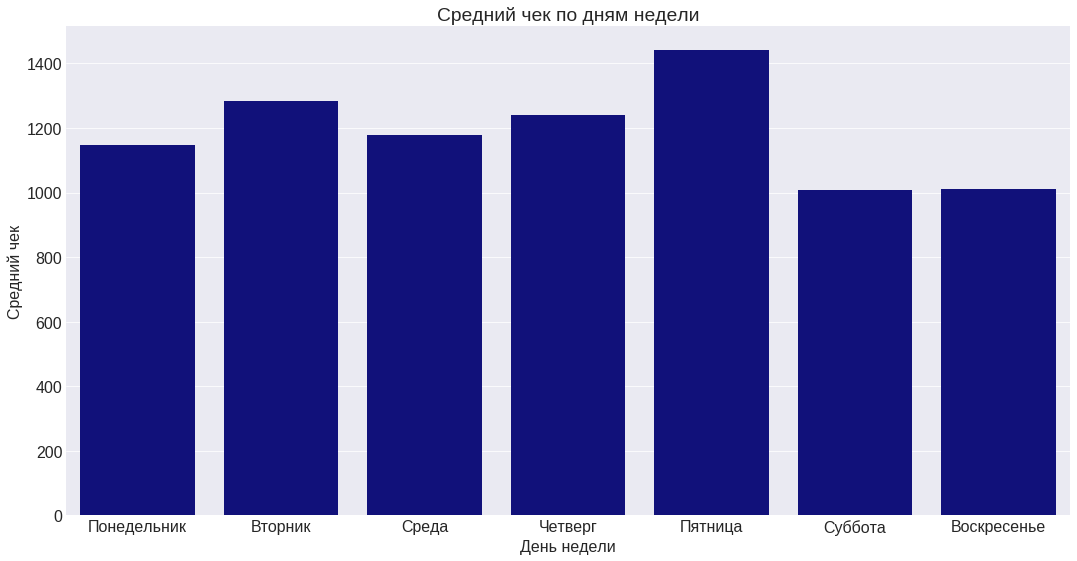

In [75]:
# посмотрим на средний чек по дням недели
fig, ax = plt.subplots()
plt.title('Средний чек по дням недели')
ax = sns.barplot(x = 'day_of_week',
                 y = 'avg_fee',
                 data = revenue_per_day_of_week,
                 color = 'darkblue')       
plt.xlabel('День недели')
plt.ylabel('Средний чек')
ax.set_xticklabels(labels = day_of_week)
plt.show()

Как и предполагалось, средний чек в выходные дни значительно меньше, чем в будние, при этом самый большой средний чек в предвыходной день - пятницу.

In [76]:
# посчитаем средний чек в месяц
round(revenue_per_month['revenue'].sum() / revenue_per_month['orders_count'].sum(), 2)

1200.39

Средний чек в месяц составляет 1200 у.е.

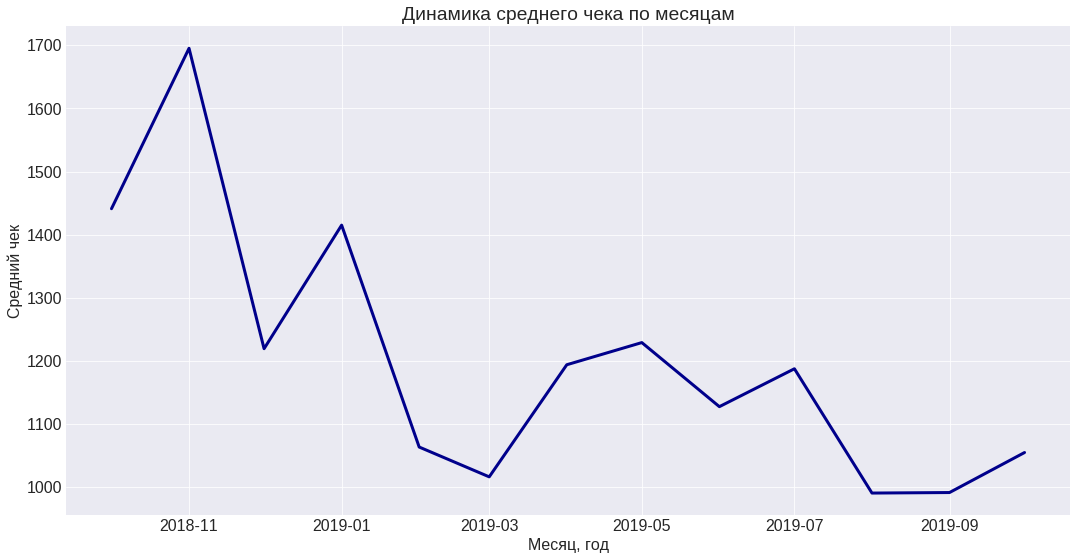

In [77]:
# посмотрим на динамику среднего чека по месяцам
fig, ax = plt.subplots()
plt.title('Динамика среднего чека по месяцам')
ax = sns.lineplot(x = 'month_year',
                  y = 'avg_fee',
                  data = revenue_per_month,
                  color = 'darkblue',
                  linewidth = 3)       
plt.xlabel('Месяц, год')
plt.ylabel('Средний чек')
plt.show()

Максимальное значение среднего чека наблюдалось в ноябре 2018 года, после чего до марта 2019 года он достаточно резко снижался. Затем значение среднего чека оставалось практически на одном уровне с небольшими всплесками.

Учитывая, что у нас имеется информация за 13 месяцев, перед сегментированием покупателей по сезону осуществления заказа необходимо удалить сведения за 1 месяц.

In [78]:
# удалим информацию за октябрь 2018 года
df_season = df_new[df_new['date'] >= '2018-11-01'].reset_index(drop = True)
df_season['month'] = df_season['date'].dt.month
df_season.head()

,date,customer_id,order_id,product,quantity,price,revenue,cluster,product_category,day_of_week,day,month,month_year
0,2018-11-01 08:00:00,c9279020-09f8-461e-a694-4937485620d5,68816,Тележка багажная DELTA ТБР-20 синий грузоподъе...,1,742.0,742,12,сумки и тележки,3,2018-11-01,11,2018-11-01
1,2018-11-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68819,Тележка багажная DELTA ТБР-20 коричневый с ора...,1,742.0,742,12,сумки и тележки,3,2018-11-01,11,2018-11-01
2,2018-11-01 15:00:00,499ee08a-43b5-4f2c-a3fc-96d04f5cbb11,68821,"Гладильная доска НИКА БЭЛЛЬ 106,5х29 см Б",1,524.0,524,13,гладильные доски,3,2018-11-01,11,2018-11-01
3,2018-11-01 15:00:00,499ee08a-43b5-4f2c-a3fc-96d04f5cbb11,68821,Подрукавник складной Ника П,1,224.0,224,0,прочие товары для дома,3,2018-11-01,11,2018-11-01
4,2018-11-01 16:00:00,fb9704c7-8106-4e7a-a2a4-70a97550deb4,68822,"Муляж ""Райские Яблочки Зеленые"" 2 шт полиурета...",1,29.0,29,14,украшения для дома,3,2018-11-01,11,2018-11-01


In [79]:
# создадим функцию для сегментирования покупателей по сезону осуществления заказа
def season_classification(month):
    
    # month - месяц осуществления заказа

    if  month in [1, 2, 12]:
        return 'зима'
    if  month in [3, 4, 5]:
        return 'весна'
    if  month in [6, 7, 8]:
        return 'лето'
    return 'осень'

In [80]:
# создадим столбец с сезоном осуществления заказа
df_season['season_category'] = df_season['month'].apply(season_classification)
df_season.sample(10)

,date,customer_id,order_id,product,quantity,price,revenue,cluster,product_category,day_of_week,day,month,month_year,season_category
3542,2019-07-11 06:00:00,f30fea52-f096-4d36-b7eb-33f9f42c291d,71938,Чехол для гладильной доски Zalger 520109 130х4...,1,239.0,239,13,гладильные доски,3,2019-07-11,7,2019-07-01,лето
525,2018-12-10 14:00:00,9d482f6d-acc5-4130-a0f0-c62c7f882a54,69287,Подсолнечник низкорослый d-13 см,3,134.0,402,5,цветы и семена,0,2018-12-10,12,2018-12-01,зима
1820,2019-04-07 20:00:00,2efd4944-edbd-4e6e-bf52-205e39dcda5e,71055,Ткань универсальная из микрофибры Micro Magic ...,13,285.0,3705,0,прочие товары для дома,6,2019-04-07,4,2019-04-01,весна
350,2018-11-24 09:00:00,e72fcd9e-d3d0-4a40-8910-6bce6e794aed,69104,Набор стаканов для виски 300 мл 6 шт серия Кар...,1,239.0,239,0,прочие товары для дома,5,2018-11-24,11,2018-11-01,осень
3824,2019-08-22 05:00:00,fa9140d4-3efb-4e64-bf91-9c53163ec791,72365,Комод Эльфпласт № 3 Алфавит оранжевый 301о,1,1349.0,1349,0,прочие товары для дома,3,2019-08-22,8,2019-08-01,лето
2493,2019-05-09 15:00:00,1809d8b0-c702-450d-a73c-76fc90386411,14742,Фуксия Blue Angel синяя с белым чашелистом объ...,1,112.0,112,8,цветы и семена,3,2019-05-09,5,2019-05-01,весна
1172,2019-02-21 19:00:00,b455ae6f-d323-47d5-825e-031275ba56ed,70396,Пеларгония розебудная Queen Ingrid укорененный...,1,134.0,134,10,цветы и семена,3,2019-02-21,2,2019-02-01,зима
844,2019-01-21 18:00:00,6e9a859b-b863-43ec-8efb-6570bdb4ea5f,69908,Штора для ванной Spirella / Спирелла TEX Porto...,1,2399.0,2399,19,аксессуары для ванной,0,2019-01-21,1,2019-01-01,зима
1841,2019-04-08 15:00:00,cfc1fd9f-ac10-417d-aad8-ce5fcbc4d786,70995,Настенная сушилка для белья Gimi Brio Super 80,1,749.0,749,9,сушилки для белья,0,2019-04-08,4,2019-04-01,весна
4267,2019-10-20 21:00:00,6583407e-7d0d-4ece-93f8-6f7cb64f9926,73041,Искусственный цветок Роза закрытая малая пласт...,30,19.0,570,6,украшения для дома,6,2019-10-20,10,2019-10-01,осень


In [81]:
# посмотрим на распределение заказов по сезону их осуществления
df_season['season_category'].value_counts()

весна    1801
осень     860
зима      853
лето      812
Name: season_category, dtype: int64

Таким образом заказы распределены по 4 категориям с их количеством от 812 до 1801.

In [82]:
# разделим покупателей на сегменты
df_season_spring = df_season[df_season['season_category'] == 'весна']
df_season_autumn = df_season[df_season['season_category'] == 'осень']
df_season_winter = df_season[df_season['season_category'] == 'зима']
df_season_summer = df_season[df_season['season_category'] == 'лето']

In [83]:
# сгруппируем заказы по сезону их осуществления и добавим столбец со средним чеком
season_category_group = df_season.groupby('season_category')\
                                 .agg(customers_count = ('customer_id', 'nunique'),
                                      orders_count = ('order_id', 'nunique'),
                                      revenue = ('revenue', 'sum'))\
                                 .sort_values(by = 'customers_count',
                                              ascending = False)\
                                 .reset_index()
season_category_group['avg_fee'] = round(season_category_group['revenue']\
                                         / season_category_group['orders_count'], 2)
season_category_group

,season_category,customers_count,orders_count,revenue,avg_fee
0,весна,621,691,787807,1140.10
1,зима,621,733,883970,1205.96
2,осень,518,582,731900,1257.56
3,лето,496,532,588031,1105.32


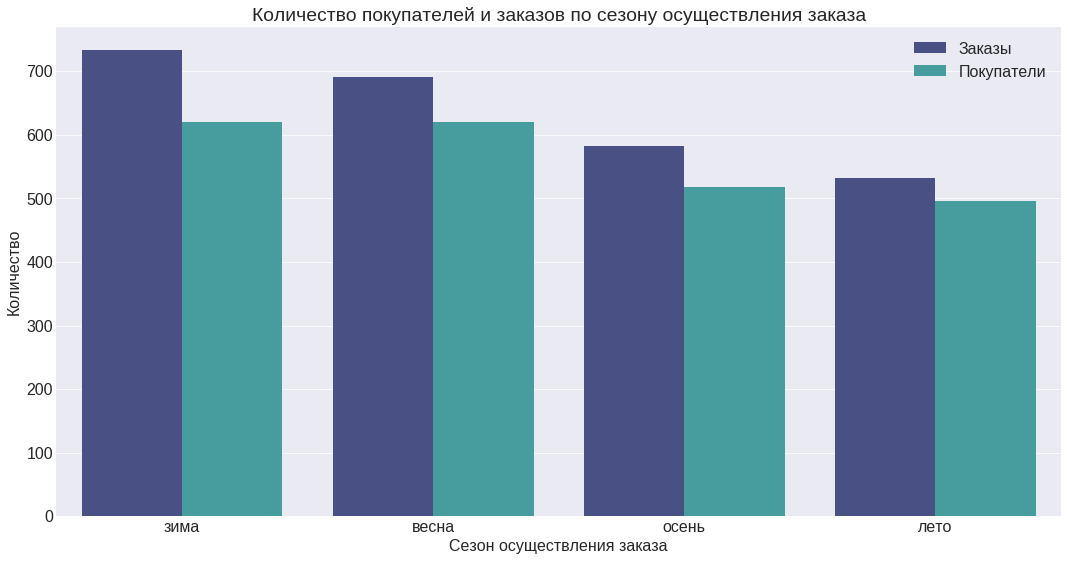

In [84]:
# построим график с количеством покупателей и заказов по сезону осуществления заказа
season_category_customer = df_season.groupby('season_category')\
                                    .agg(users_count = ('customer_id', 'nunique'))\
                                    .sort_values(by = 'users_count',
                                                 ascending = False)\
                                    .reset_index()
season_category_customer['type_users'] = 'Покупатели'
season_category_order = df_season.groupby('season_category')\
                                 .agg(users_count = ('order_id', 'nunique'))\
                                 .sort_values(by = 'users_count',
                                              ascending = False)\
                                 .reset_index()
season_category_order['type_users'] = 'Заказы'
season_category_all = pd.concat([season_category_order, season_category_customer], ignore_index = True)
fig, ax = plt.subplots()
plt.title('Количество покупателей и заказов по сезону осуществления заказа')
ax = sns.barplot(x = 'season_category',
                 y = 'users_count',
                 data = season_category_all,
                 hue = 'type_users',
                 palette = 'mako')
plt.ylabel('Количество')
plt.xlabel('Сезон осуществления заказа')
plt.legend(title = None)
plt.show()

Наибольшее количество и покупателей, и заказов зимой, наименьшее - летом.

Для исследования значений выручки и среднего чека рассчитаем кумулятивные показатели.

In [85]:
# применим функцию для расчета кумулятивной выручки по сезону осуществления заказа
cumulative_data_season = cumulative_data(df_season, 'season_category')
cumulative_data_season.tail()

,date,season_category,orders_count,customers_count,revenue,avg_fee
4320,2019-10-31 09:00:00,осень,577,515,729526,1264.34
4321,2019-10-31 11:00:00,осень,579,516,730259,1261.24
4323,2019-10-31 12:00:00,осень,580,517,731346,1260.94
4324,2019-10-31 13:00:00,осень,581,518,731503,1259.04
4325,2019-10-31 14:00:00,осень,582,518,731900,1257.56


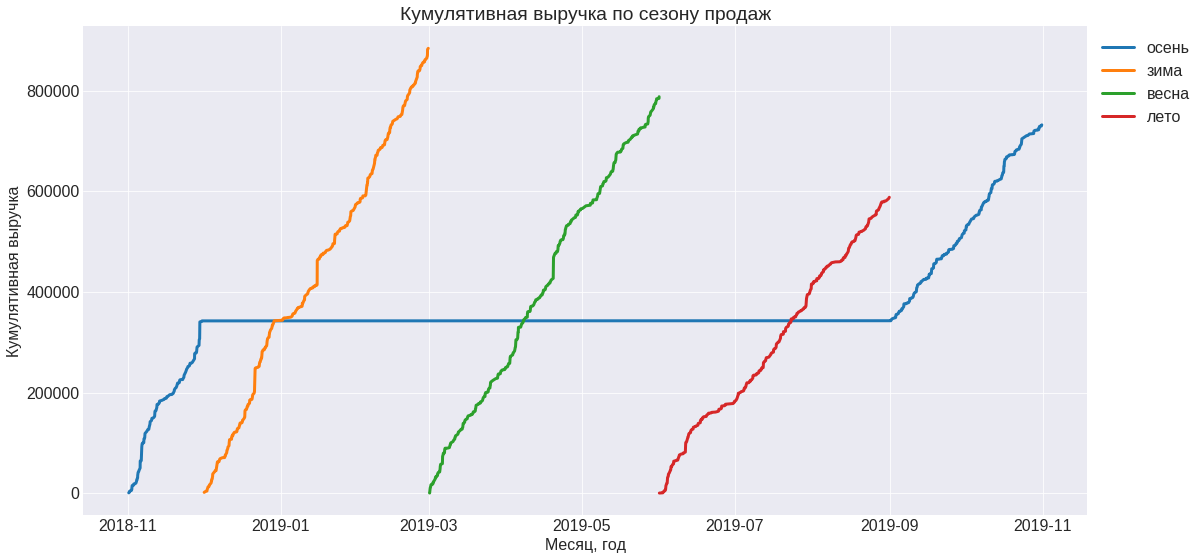

In [86]:
# применим функцию для построения графиков кумулятивной выручки по сезону осуществления заказа
cumulative_plot(cumulative_data_season,
                'revenue',
                'season_category',
                'Кумулятивная выручка по сезону продаж',
                'Кумулятивная выручка')

Наибольшую выручку принесли покупатели зимой, наименьшую - летом, при этом по всем сезонам кумулятивная выручка растет достаточно равномерно.

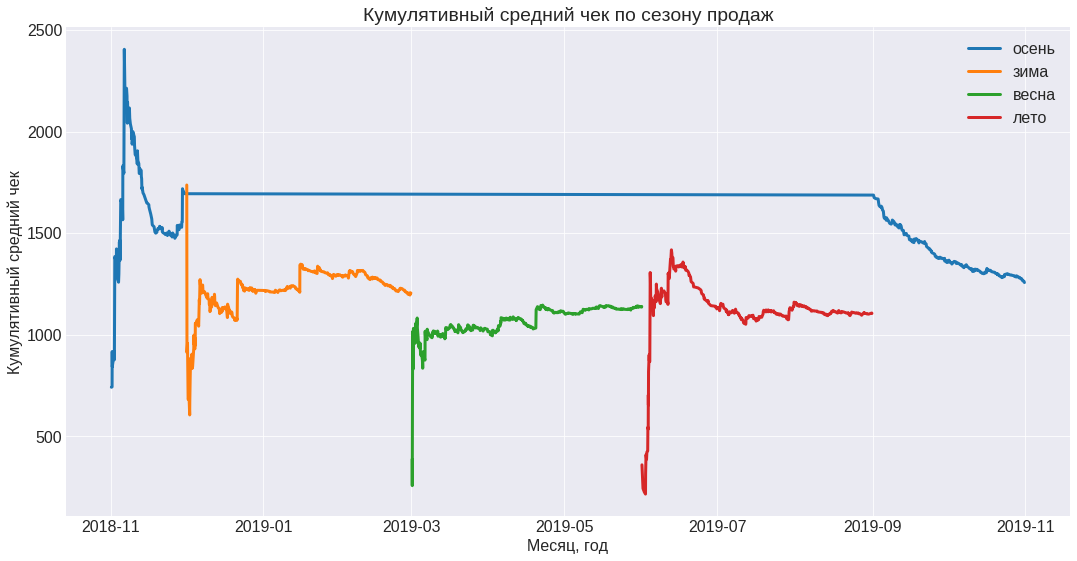

In [87]:
# применим функцию для для построения графиков кумулятивного среднего чека по сезону осуществления заказа
cumulative_plot(cumulative_data_season,
                'avg_fee',
                'season_category',
                'Кумулятивный средний чек по сезону продаж',
                'Кумулятивный средний чек')

Наибольший средний чек у покупателей осенью, наименьший - летом, при этом практически по всем сезонам через месяц после начала анализируемого периода кумулятивный средний чек находится практически на одном уровне. Исключение - осень с достаточно стабильным постепенным снижением среднего чека. 

Для повышения эффективности работы интернет-магазина в дальнейшем следует проверить гипотезу о равенстве среднего чека покупателей, осуществлявших покупки в различные сезоны.

#### Проверка статистических гипотез
<a name="analysis_3"></a> 

Осуществим проверку следующих статистических гипотез:  
   * о равенстве среднего чека покупателей, осуществлявших покупки товаров двух и более разных категорий, и прочих покупателей;  
   * о равенстве среднего чека покупателей по сезону осуществления заказа.   

Перед проверкой гипотез проверим количество заказов и выручку по покупателям на наличие аномальных значений.

In [88]:
# создадим таблицу с количеством заказов по покупателям
orders_by_сustomers = df_new.groupby('customer_id',
                                     as_index = False)\
                            .agg({'order_id' : pd.Series.nunique})
orders_by_сustomers.columns = ['customer_id',
                               'orders_count']
orders_by_сustomers.sort_values(by = 'orders_count',
                                ascending = False)\
                   .head(10)

,customer_id,orders_count
1886,c971fb21-d54c-4134-938f-16b62ee86d3b,126
732,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35
1081,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
1720,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
17,0184f535-b60a-4914-a982-231e3f615206,5
1791,bea7a833-2074-42db-bc49-4457abd3c930,4
2111,e0535076-6270-4df2-8621-cb06264a94fa,4
690,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4
987,6a86cc77-ef15-496f-b5d3-89005597ee5d,3
992,6b0c6cfb-7717-4c34-8535-bbc6e2b2c758,3


8 покупателей осуществили от 4 заказов и более.

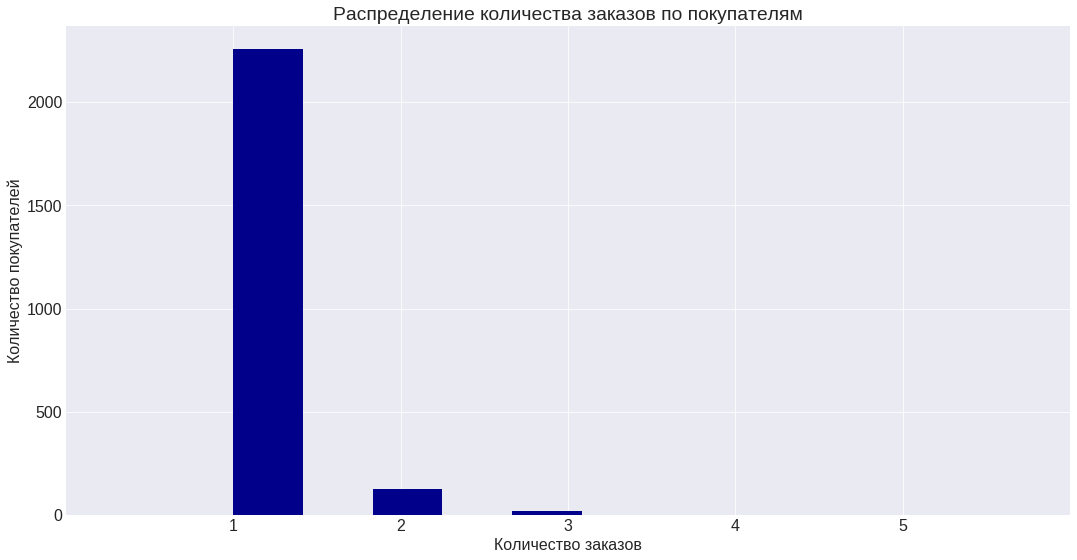

In [89]:
# посмотрим на распределение количества заказов по покупателям
fig, ax = plt.subplots()
ax.set(title = 'Распределение количества заказов по покупателям',
       xlabel = 'Количество заказов',
       ylabel = 'Количество покупателей')
ax.hist(orders_by_сustomers['orders_count'],
        bins = 300,
        color = 'darkblue')
plt.xlim(0, 6)
plt.xticks(range(1, 6))
plt.show()

Большинство покупателей заказывали только один раз, доля покупателей с более, чем одним заказом, очень незначительна.

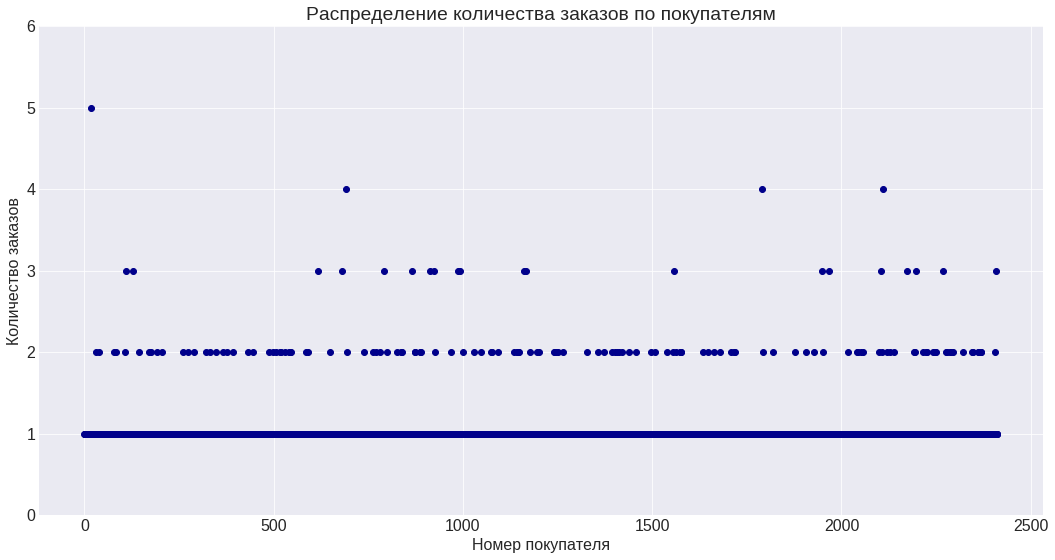

In [90]:
# построим точечную диаграмму числа заказов по покупателям
fig, ax = plt.subplots()
ax.set(title = 'Распределение количества заказов по покупателям',
       xlabel = 'Номер покупателя',
       ylabel = 'Количество заказов')
x_values = pd.Series(range(0, len(orders_by_сustomers)))
ax.scatter(x_values,
           orders_by_сustomers['orders_count'],
           color = 'darkblue')
plt.ylim(0, 6)
plt.show()

Выводы подтверждаются: покупателей  с более, чем одним заказом, очень мало, непонятно, какое количество заказов на одного покупателя считать аномалиями.

In [91]:
# посчитаем перцентили количества заказов на покупателя
np.percentile(orders_by_сustomers['orders_count'], [95, 99])

array([2., 3.])

Не более 5% покупателей оформляли больше, чем 2 заказа, и 1% покупателей - 3 и более. Выберем 2 заказа на одного покупателя за нижнюю границу числа заказов, чтобы отсеять аномальных покупателей по ней.

In [92]:
# создадим таблицу с выручкой по покупателям
revenue_by_сustomers = df_new.groupby('customer_id',
                                      as_index = False)\
                             .agg({'revenue' : 'sum'})
revenue_by_сustomers.columns = ['customer_id',
                                'revenue']
revenue_by_сustomers.sort_values(by = 'revenue',
                                 ascending = False)\
                    .head(10)

,customer_id,revenue
1886,c971fb21-d54c-4134-938f-16b62ee86d3b,159508
732,4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278
827,58a4c3cc-504f-43ea-a74a-bae19e665552,53232
690,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900
1338,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,33680
974,6987e6d6-a63a-4ce2-a2d0-f424092d235e,32718
262,1b2764ad-9151-4051-a46a-9b01b62e6335,24370
1483,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,22056
1081,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21361
1373,940c175f-ea87-44e0-9e16-0a3d0a9abecd,20232


10 покупателей принесли выручку более 20000 у.е. каждый.

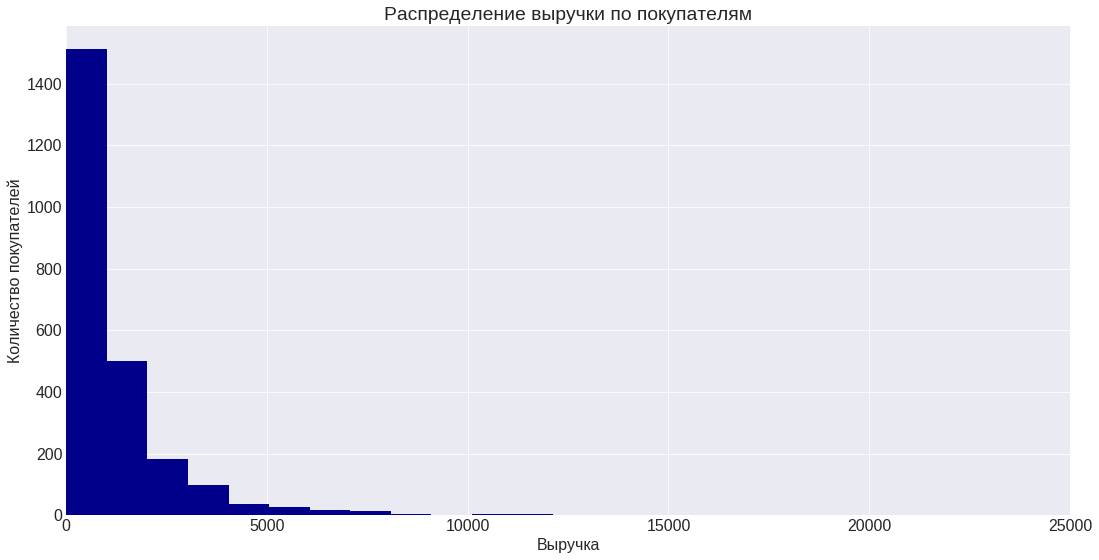

In [93]:
# посмотрим на распределение выручки по покупателям
fig, ax = plt.subplots()
ax.set(title = 'Распределение выручки по покупателям',
       xlabel = 'Выручка',
       ylabel = 'Количество покупателей')
ax.hist(revenue_by_сustomers['revenue'],
        bins = 158,
        color = 'darkblue')
plt.xlim(0, 25000)
plt.show()

Большинство покупателей принесли выручку до 2000 у.е., хотя доля покупателей с большей выручкой весьма значительна.

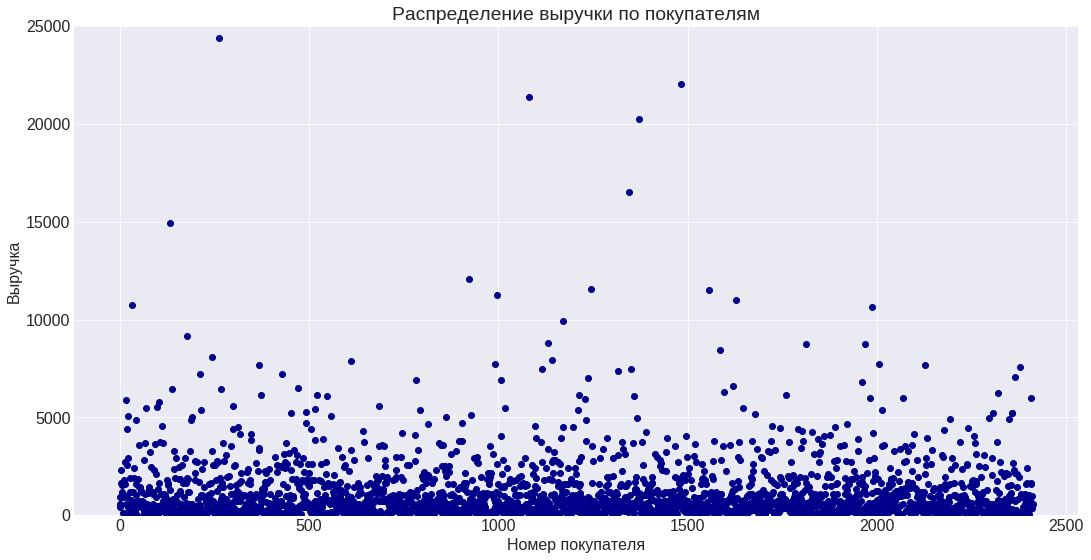

In [94]:
# построим точечную диаграмму числа выручки по покупателям
fig, ax = plt.subplots()
ax.set(title = 'Распределение выручки по покупателям',
       xlabel = 'Номер покупателя',
       ylabel = 'Выручка')
x_values = pd.Series(range(0, len(revenue_by_сustomers)))
ax.scatter(x_values,
           revenue_by_сustomers['revenue'],
           color = 'darkblue')
plt.ylim(0, 25000)
plt.show()

Исходя из диаграммы, граница аномальных значений выручки на одного покупателя - около 5000 у.е.

In [95]:
# посчитаем перцентили выручки на одного покупателя
np.percentile(revenue_by_сustomers['revenue'], [95, 99])

array([4049. , 8393.8])

Не более 5% покупателей принесли выручку больше, чем 4049 у.е., и 1% покупателей - 8394 у.е. и более. Выберем 5000 у.е. за нижнюю границу выручки на одного покупателя, чтобы отсеять аномальных покупателей по ней.

In [96]:
# сделаем срезы с аномальными пользователями
сustomers_with_many_orders = orders_by_сustomers[orders_by_сustomers['orders_count'] > 2]['customer_id']
сustomers_with_expensive_orders = revenue_by_сustomers[revenue_by_сustomers['revenue'] > 5000]['customer_id']
abnormal_сustomers = pd.concat([сustomers_with_many_orders,
                                сustomers_with_expensive_orders],
                               axis = 0)\
                       .drop_duplicates()\
                       .sort_values()
abnormal_сustomers.head() 

17    0184f535-b60a-4914-a982-231e3f615206
23    01c31cf3-cdb3-4b90-a2ef-ebe1b9e1fc33
32    02adb72a-3067-45e9-a3b5-f93d79d7496a
69    06e2fc7e-6183-4419-ada4-3b976baeed92
99    09bcc3d0-8134-4f00-8ea5-b74b55d766ad
Name: customer_id, dtype: object

In [97]:
# посчитаем количество аномальных пользователей
abnormal_сustomers.shape

(103,)

Всего выявлено 103 аномальных покупателя.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами покупателей, осуществлявшими покупки товаров двух и более разных категорий, и прочими.  

In [98]:
# исключим из таблиц строки с аномальными покупателями и осчитаем количество удаленных строк
df_groups_more_one_filtred = df_groups_more_one[~df_groups_more_one['customer_id'].isin(abnormal_сustomers)]\
                                               .reset_index(drop = True)
df_group_one_filtred = df_group_one[~df_group_one['customer_id'].isin(abnormal_сustomers)]\
                                   .reset_index(drop = True)
(round(100 - len(df_groups_more_one_filtred) / len(df_groups_more_one) * 100, 1),
round(100 - len(df_group_one_filtred) / len(df_group_one) * 100, 1))

(47.6, 8.1)

Исключив аномальных покупателей, в таблицах удалено соответственно 47,6% и 8,1% строк.

Присвоим номера групп:  
1 - покупатели, осуществлявшие покупки товаров двух и более разных категорий;  
2 - покупатели, осуществлявшие покупки товаров только одной категории.    
Критический уровень статистической значимости определим в 5%.   
Сформулируем гипотезы:  
Н0 - различий в среднем чеке между группами нет.    
Н1 - различия в среднем чеке между группами есть.

In [99]:
# зададим критический уровень статистической значимости
alpha = .05

In [100]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
p_value = st.mannwhitneyu(df_groups_more_one.groupby('order_id')['revenue'].sum(),
                          df_group_one.groupby('order_id')['revenue'].sum(),
                          alternative = 'two-sided')[1]
print('Уровень статистической значимости: ', alpha)
print('Значение p-value: {:.3f}'.format(p_value))
print('Относительный прирост среднего чека: {:.1%}'.format\
                             (df_groups_more_one.groupby('order_id')['revenue'].sum().mean()\
                             / df_group_one.groupby('order_id')['revenue'].sum().mean() - 1))
if (p_value < alpha):
    print('Отвергаем нулевую гипотезу: различия в среднем чеке между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными')

Уровень статистической значимости:  0.05
Значение p-value: 0.000
Относительный прирост среднего чека: 31.6%
Отвергаем нулевую гипотезу: различия в среднем чеке между группами есть


In [101]:
# посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
p_value = st.mannwhitneyu(df_groups_more_one_filtred.groupby('order_id')['revenue'].sum(),
                          df_group_one_filtred.groupby('order_id')['revenue'].sum(),
                          alternative = 'two-sided')[1]
print('Уровень статистической значимости: ', alpha)
print('Значение p-value: {:.3f}'.format(p_value))
print('Относительный прирост среднего чека: {:.1%}'.format\
                             (df_groups_more_one_filtred.groupby('order_id')['revenue'].sum().mean()\
                             / df_group_one_filtred.groupby('order_id')['revenue'].sum().mean() - 1))
if (p_value < alpha):
    print('Отвергаем нулевую гипотезу: различия в среднем чеке между группами есть')
else:
    print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными')

Уровень статистической значимости:  0.05
Значение p-value: 0.000
Относительный прирост среднего чека: 33.9%
Отвергаем нулевую гипотезу: различия в среднем чеке между группами есть


И по "сырым", и по "очищенным" данным установлены статистически значимые различия между группами покупателей, осуществлявшими покупки товаров двух и более разных категорий, и прочими. Таким образом, целесообразно заинтересовывать покупателей в приобретении максимально разнообразных товаров. Вместе с тем, следует иметь ввиду, что у нас имеется совсем небольшое количество покупателей, приобретавших товары разных категорий, что могло негативно сказаться на качестве проверки гипотезы.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами покупателей, осуществлявших покупки товаров в разные сезоны года.  

In [102]:
# исключим из таблиц строки с аномальными покупателями и посчитаем количество удаленных строк
df_season_spring_filtred = df_season_spring[~df_season_spring['customer_id'].isin(abnormal_сustomers)]\
                                           .reset_index(drop = True)
df_season_autumn_filtred = df_season_autumn[~df_season_autumn['customer_id'].isin(abnormal_сustomers)]\
                                           .reset_index(drop = True)
df_season_winter_filtred = df_season_winter[~df_season_winter['customer_id'].isin(abnormal_сustomers)]\
                                           .reset_index(drop = True)
df_season_summer_filtred = df_season_summer[~df_season_summer['customer_id'].isin(abnormal_сustomers)]\
                                           .reset_index(drop = True)
(round(100 - len(df_season_spring_filtred) / len(df_season_spring) * 100, 1),
round(100 - len(df_season_autumn_filtred) / len(df_season_autumn) * 100, 1),
round(100 - len(df_season_winter_filtred) / len(df_season_winter) * 100, 1),
round(100 - len(df_season_summer_filtred) / len(df_season_summer) * 100, 1))

(10.7, 10.8, 15.5, 7.1)

Исключив аномальных покупателей, в таблицах удалено соответственно 10,7%, 10,8%, 15,5% и 7,1% строк.

Присвоим номера групп:  
1 - покупатели, осуществлявшие покупки весной;  
2 - покупатели, осуществлявшие покупки осенью;   
3 - покупатели, осуществлявшие покупки зимой;   
4 - покупатели, осуществлявшие покупки летом.       
Критический уровень статистической значимости определим в 5%. Учитывая, что будет проведено 6 попарных сравнений, к уровню статистической значимости применим поправку Бонферрони.  
Сформулируем гипотезы:  
Н0 - различий в среднем чеке между группами нет.    
Н1 - различия в среднем чеке между группами есть.

In [103]:
# применим поправку Бонферрони к уровню значимости
bonferroni_alpha = alpha / 6

In [104]:
# создадим функцию для проверки гипотезы
def test_season(df_1, df_2, season_1, season_2, quality):    
   
    # df_1 и df_2 - срезы, для которых проверяются гипотезы; season_1 и  season_2 - псрезы, для которых 
    # проверяются гипотезы, quality - качество данных
    
    print('Проверка гипотезы для сезонов {} и {} по {} данным'.format(season_1, season_2, quality))   
    print()
    print('Уровень статистической значимости: ', round(bonferroni_alpha, 3))   
    p_value = st.mannwhitneyu(df_1.groupby('order_id')['revenue'].sum(),
                              df_2.groupby('order_id')['revenue'].sum(),
                              alternative = 'two-sided')[1]
    print('Значение p-value: {:.3f}'.format(p_value))
    print('Относительный прирост среднего чека: {:.1%}'.format\
                                 (df_1.groupby('order_id')['revenue'].sum().mean()\
                                 / df_2.groupby('order_id')['revenue'].sum().mean() - 1))
    print()
    if (p_value < bonferroni_alpha):
        print('Отвергаем нулевую гипотезу: различия в среднем чеке между группами есть')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными')

In [105]:
# проверим гипотезу для сезонов "весна" и "лето" по "сырым" данным
test_season(df_season_spring, df_season_summer, 'весна', 'лето', 'сырым')

Проверка гипотезы для сезонов весна и лето по сырым данным

Уровень статистической значимости:  0.008
Значение p-value: 0.394
Относительный прирост среднего чека: 3.1%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [106]:
# проверим гипотезу для сезонов "весна" и "осень" по "сырым" данным
test_season(df_season_spring, df_season_autumn, 'весна', 'осень', 'сырым')

Проверка гипотезы для сезонов весна и осень по сырым данным

Уровень статистической значимости:  0.008
Значение p-value: 0.440
Относительный прирост среднего чека: -9.3%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [107]:
# проверим гипотезу для сезонов "весна" и "зима" по "сырым" данным
test_season(df_season_spring, df_season_winter, 'весна', 'зима', 'сырым')

Проверка гипотезы для сезонов весна и зима по сырым данным

Уровень статистической значимости:  0.008
Значение p-value: 0.957
Относительный прирост среднего чека: -5.5%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [108]:
# проверим гипотезу для сезонов "зима" и "лето" по "сырым" данным
test_season(df_season_winter, df_season_summer, 'зима', 'лето', 'сырым')

Проверка гипотезы для сезонов зима и лето по сырым данным

Уровень статистической значимости:  0.008
Значение p-value: 0.352
Относительный прирост среднего чека: 9.1%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [109]:
# проверим гипотезу для сезонов "зима" и "осень" по "сырым" данным
test_season(df_season_winter, df_season_autumn, 'зима', 'осень', 'сырым')

Проверка гипотезы для сезонов зима и осень по сырым данным

Уровень статистической значимости:  0.008
Значение p-value: 0.454
Относительный прирост среднего чека: -4.1%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [110]:
# проверим гипотезу для сезонов "лето" и "осень" по "сырым" данным
test_season(df_season_summer, df_season_autumn, 'лето', 'осень', 'сырым')

Проверка гипотезы для сезонов лето и осень по сырым данным

Уровень статистической значимости:  0.008
Значение p-value: 0.126
Относительный прирост среднего чека: -12.1%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [111]:
# проверим гипотезу для сезонов "весна" и "лето" по "очищенным" данным
test_season(df_season_spring_filtred, df_season_summer_filtred, 'весна', 'лето', 'очищенным')

Проверка гипотезы для сезонов весна и лето по очищенным данным

Уровень статистической значимости:  0.008
Значение p-value: 0.210
Относительный прирост среднего чека: 9.8%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [112]:
# проверим гипотезу для сезонов "весна" и "осень" по "очищенным" данным
test_season(df_season_spring_filtred, df_season_autumn_filtred, 'весна', 'осень', 'очищенным')

Проверка гипотезы для сезонов весна и осень по очищенным данным

Уровень статистической значимости:  0.008
Значение p-value: 0.643
Относительный прирост среднего чека: -4.4%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [113]:
# проверим гипотезу для сезонов "весна" и "зима" по "очищенным" данным
test_season(df_season_spring_filtred, df_season_winter_filtred, 'весна', 'зима', 'очищенным')

Проверка гипотезы для сезонов весна и зима по очищенным данным

Уровень статистической значимости:  0.008
Значение p-value: 0.906
Относительный прирост среднего чека: 0.9%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [114]:
# проверим гипотезу для сезонов "зима" и "лето" по "очищенным" данным
test_season(df_season_winter_filtred, df_season_summer_filtred, 'зима', 'лето', 'очищенным')

Проверка гипотезы для сезонов зима и лето по очищенным данным

Уровень статистической значимости:  0.008
Значение p-value: 0.165
Относительный прирост среднего чека: 8.8%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [115]:
# проверим гипотезу для сезонов "зима" и "осень" по "очищенным" данным
test_season(df_season_winter_filtred, df_season_autumn_filtred, 'зима', 'осень', 'очищенным')

Проверка гипотезы для сезонов зима и осень по очищенным данным

Уровень статистической значимости:  0.008
Значение p-value: 0.700
Относительный прирост среднего чека: -5.2%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


In [116]:
# проверим гипотезу для сезонов "лето" и "осень" по "очищенным" данным
test_season(df_season_summer_filtred, df_season_autumn_filtred, 'лето', 'осень', 'очищенным')

Проверка гипотезы для сезонов лето и осень по очищенным данным

Уровень статистической значимости:  0.008
Значение p-value: 0.104
Относительный прирост среднего чека: -12.9%

Не получилось отвергнуть нулевую гипотезу, нет оснований считать средние чеки разными


И по "сырым", и по "очищенным" данным статистически значимые различия между группами покупателей, осуществлявшими покупки товаров в разные сезоны года не установлены, даже несмотря на относительные различия средних чеков в разрезе сезонов вплоть до 12%.

#### Вывод
<a name="analysis_4"></a> 

Сегментирование покупателей было проведено по двум критериям:  
  1.  по категориям приобретаемых товаров;  
  2.  по сезону осуществления заказа.  

Сегментирование по категориям приобретаемых товаров проведено при помощи алгоритма машинного обучения без учителя K-Means, перед этим текст был преобразован в частотные векторы слова с использованием метода TF-IDF. В результате все товары были разделены на 20 кластеров с их количеством от 85 до 1073. Для распределения товаров по категориям был изучен состав каждого кластера, в результате чего были установлены следующие категории товаров:  
  -  цветы и семена;    
  -  пластмассовые изделия;  
  -  сумки и тележки;  
  -  украшения для дома;  
  -  сушилки для белья;  
  -  гладильные доски;  
  -  коврики;   
  -  аксессуары для ванной;   
  -  прочие товары для дома.   

Вследствие проведенной работы товары были распределены по 10 категориям с количеством их заказов от 88 до 2476. 

Наибольшее количество и покупателей, и заказов оказалось у категорий "цветы и семена" и "прочие товары для дома", наименьшее - "текстильные изделия" и "коврики". 

Наибольшую выручку принесли покупатели категории товаров "прочие товары для дома" и "сумки и тележки", наименьшую - "украшения для дома" и "пластмассовые изделия", при этом практически по всем категориям кумулятивная выручка растет достаточно равномерно. Исключение - товары из категорий "цветы и семена" с более резким ростом в апреле - июне 2019 года, связанный с сезонностью покупок товаров данной категории, а также "текстильные изделия" с сильным всплеском в январе, вероятнее всего связанный с разовой крупной покупкой.   

Наибольший средний чек у покупателей категории товаров "текстильные изделия" и "сумки и тележки", наименьший - "украшения для дома" и "цветы и семена" (категория с наибольшим количеством покупателей и заказов), при этом практически по всем категориям через 2 месяца после начала анализируемого периода кумулятивный средний чек находится практически на одном уровне. Исключение - товары из категории "текстильные изделия" с сильным всплеском в январе, вероятнее всего связанный с разовой крупной покупкой. Кроме того обращает на себя внимание постепенное снижение среднего чека у товаров из категорий "прочие товары для дома", "коврики" и "украшения для дома".  

Для более углубленного анализа покупатели дополнительно были разделены на два сегмента: тех, кто осуществлял покупки товаров только одной категории, и тех, кто покупал товары двух и более разных категорий. В первую категорию попал 71 покупатель, что составляет чуть менее 3% от всех покупателей.  Таким образом, очень небольшое количество покупателей осуществляют покупки товаров двух и более разных категорий. Вероятнее всего здесь имеется существенный резерв для повышения эффективности работы интернет-магазина. Вместе с тем, уже сейчас следует обратить внимание, что у 11 покупателей присутствует комбинация товаров из категорий "гладильные доски" и "сушилки для белья", т.е. целесообразно покупателям, приобретающим товары из одной указанной категории, предлагать продукты из другой. Вызывает обеспокоенность, что всего 15 покупателей, приобретавших товары из категории "цветы и семена", купили товары из категории "прочие товары для дома", в которую попали садовые инструменты, удобрения и т.п.

Средняя выручка в день составляет 8529 у.е. В основном дневная выручка не превышает 20000 у.е., хотя имеется определенное количество дней с большой выручкой, в некоторые дни даже более 50000 у.е. С течением времени среднедневная выручка снижается. Большое количество зубцов свидетельствует о разном распределении выручки между будними и выходными днями - выручка в выходные дни резко снижается, при этом самая большая по вторникам, а самая маленькая по субботам. Средняя выручка в месяц составляет 256515 у.е. Максимальная средняя выручка в месяц была в течение первых трех месяцев анализируемого периода, а затем резко упала, достигнув минимума в августе 2019 года (в 2 раза меньше максимального значения).   

Средний чек в день составляет 1197 у.е. В основном средний чек в день не превышает 2000 у.е., хотя имеется определенное количество дней с большим чеком, в некоторые дни даже более 4000 у.е. С течением времени средний чек в день снижается. Большое количество зубцов свидетельствует о разном среднем чеке в будние и выходные дни - средний чек в выходные дни значительно меньше, чем в будние, при этом самый большой средний чек в предвыходной день - пятницу. Средний чек в месяц составляет 1200 у.е. Максимальное значение среднего чека наблюдалось в ноябре 2018 года, после чего до марта 2019 года он достаточно резко снижался. Затем значение среднего чека оставалось практически на одном уровне с небольшими всплесками.   

Вследствие сегментирования покупателей по сезону осуществления заказа (зима, весна, лето и осень), они были распределены по 4 категориям с количеством от 812 до 1801. Наибольшее количество и покупателей, и заказов оказалось зимой, наименьшее - летом, наибольшую выручку принесли покупатели также зимой, наименьшую - летом, при этом по всем сезонам кумулятивная выручка растет достаточно равномерно. Наибольший средний чек у покупателей осенью, наименьший - летом, при этом практически по всем сезонам через месяц после начала анализируемого периода кумулятивный средний чек находится практически на одном уровне. Исключение - осень с достаточно стабильным постепенным снижением среднего чека.   

Были осуществлены проверки следующих статистических гипотез:  
  1.  о равенстве среднего чека покупателей, осуществлявших покупки товаров двух и более разных категорий, и прочих покупателей;  
  2.  о равенстве среднего чека покупателей по сезону осуществления заказа.   
   
Перед проверкой гипотез количество заказов и выручка по покупателям были проверены на наличие аномальных значений. В результате оказалось, что не более 5% покупателей оформляли больше, чем 2 заказа, а также принесли выручку больше, чем 4049 у.е. Таким образом были выбраны 2 заказа и 5000 у.е. за нижние границы соответственно числа заказов и выручки на одного покупателя, чтобы отсеять аномальных покупателей по ним. Оказалось, что в данных имеется 103 аномальных покупателя.   

В результате проверки первой гипотезы и по "сырым", и по "очищенным" данным установлены статистически значимые различия между группами покупателей, осуществлявшими покупки товаров двух и более разных категорий, и прочими. Таким образом, целесообразно заинтересовывать покупателей в приобретении максимально разнообразных товаров. Вместе с тем, следует иметь ввиду, что у нас имеется совсем небольшое количество покупателей, приобретавших товары разных категорий, что могло негативно сказаться на качестве проверки гипотезы.   
  
В результате проверки второй гипотезы и по "сырым", и по "очищенным" данным статистически значимые различия между группами покупателей, осуществлявшими покупки товаров в разные сезоны года не установлены, даже несмотря на относительные различия средних чеков в разрезе сезонов вплоть до 12%.   

### Рекомендации
<a name="recommendations"></a>

1.  Заинтересовывать покупателей в приобретении товаров из разных категорий.    
2.  При приобретении товаров из категорий "гладильные доски" или "сушилки для белья" предлагать покупателям товары из противоположной категории.   
3.  При приобретении товаров из категории "цветы и семена" предлагать покупателям сопутствующие товары.   
4.  Проводить по пятницам акции для привлечения покупателей к покупкам.   
5.  Провести дополнительное исследование для определения причин постепенного снижения выручки и среднего чека. 